MODELISATION

Random Rorest

In [1]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install --upgrade scipy


  Using cached scipy-1.13.0-cp39-cp39-win_amd64.whl (46.2 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.1
    Uninstalling scipy-1.9.1:
      Successfully uninstalled scipy-1.9.1
Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install --user scipy==1.9.1


     ---------------------------------------- 38.6/38.6 MB 3.2 MB/s eta 0:00:00
  Using cached numpy-1.24.4-cp39-cp39-win_amd64.whl (14.9 MB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.4 which is incompatible.


In [2]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 1000)
pd.set_option("display.max_rows", 1000)

## sklearn : https://scikit-learn.org/stable/index.html
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn import set_config
set_config(display = "diagram")

## matplotlib : https://matplotlib.org/
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

## stop warings
import warnings
warnings.filterwarnings("ignore")

import scikitplot as skplt
from scipy.stats import randint as sp_randint
import pickle

I- Retraitement des variables

In [3]:
import pandas as pd
file = "E:/BE suite/CATNATavecnonsinistrées_précip_debitshauteurs2.csv"
CATNAT_NON_CATNAT = pd.read_csv(file, dtype={3: str, 44: str}, sep=";")
CATNAT_NON_CATNAT

,Unnamed: 0,NUMERO,Insee,Année,Commune,DateDébut,DateFin,DateArrêté,DateJO,Franchise,Décision,TRI,Nom_TRI,TRI_Portée_Nationale,Arrêté,Longitudes,Latitudes,SWI_UNIF_MENS3,Quantile_SWI_Maille_Pct,Quantile_SWI_Mailles_Total_Pct,SWI_max_annuel,SWI_min_annuel,SWI_median_annuel,SWI_moyenne_annuelle,SWI_ecart_type_annuel,durée_inondation,DistancePlusProche,Distance_2eme_CoursEauProche,Distance_3eme_CoursEauProche,Altitude_moyenne,Territoire_artificialises,Territoire_agricoles,Zone_agrico_heterogene,Zone_humide_interieure,Zone_humides_cotiere,Eaux_continentales,Eaux_maritimes,Perimetre_irrigue,Plage_Dune_Sable,Cours_Voies_Eaux,Plans_Eaux,gid,CdRegionHy,LbRegionHy,TYPO,SWI_moyenne_maille,SWI_median_maille,SWI_min_maille,SWI_max_maille,SWI_ecart_type_maille,RM_Y,Rm_Y,R_sdY,RM_M,Rm_M,R_sdM,era_RM_M,era_Rm_M,era_R_sdM,nb_jours_pluvieux/3j_avant,nb_jours_pluvieux/7j_avant,era_precip,era_rol3j,era_rol7j,era_rol10j,era_rol30j,Q_M,Q_m,Q_sd,Q_mean,Q_median,H_M,H_m,H_sd,H_mean,H_median,R_M,R_m,R_sd,R_mean,R_median
0,0,3.0,59271,2009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,oui,TRI_DUNKERQUE,non,non,2.290626,51.016863,NaN,NaN,NaN,1.116,0.073,0.6585,0.641250,0.313774,NaN,251.422684,491.182449,907.320996,4.0,1581.633202,292.829642,238.687239,0.0,0.0,176.564567,0.0,0.0,0.0,0.0,176.564567,10.0,E,l'Escaut et fleuves Côtiers se jetant dans la ...,4.0,0.740407,0.7715,-0.086,1.246,0.251127,23.046358,-0.000004,3.051966,23.046358,3.431611,4.357634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,4.0,1.144667,15.723009,16.0,7652.736264,786.250000,382.274154,4532.333503,4538.000000,56.81696,-0.000007,3.476860,51.376431,50.289472
1,1,3.0,59271,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,oui,TRI_DUNKERQUE,non,non,2.290626,51.016863,NaN,NaN,NaN,1.065,0.329,0.6160,0.659917,0.238621,NaN,251.422684,491.182449,907.320996,4.0,1581.633202,292.829642,238.687239,0.0,0.0,176.564567,0.0,0.0,0.0,0.0,176.564567,10.0,E,l'Escaut et fleuves Côtiers se jetant dans la ...,4.0,0.740407,0.7715,-0.086,1.246,0.251127,31.722342,0.000000,3.087065,31.722342,3.403099,6.355388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,4.0,1.144667,15.723009,16.0,7652.736264,786.250000,382.274154,4532.333503,4538.000000,56.81696,-0.000007,3.476860,51.376431,50.289472
2,2,3.0,59271,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,oui,TRI_DUNKERQUE,non,non,2.290626,51.016863,NaN,NaN,NaN,1.127,0.357,0.6425,0.692083,0.242197,NaN,251.422684,491.182449,907.320996,4.0,1581.633202,292.829642,238.687239,0.0,0.0,176.564567,0.0,0.0,0.0,0.0,176.564567,10.0,E,l'Escaut et fleuves Côtiers se jetant dans la ...,4.0,0.740407,0.7715,-0.086,1.246,0.251127,22.018023,0.000000,3.538769,22.018023,5.988844,3.974613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,4.0,1.144667,15.723009,16.0,7652.736264,786.250000,382.274154,4532.333503,4538.000000,56.81696,-0.000007,3.476860,51.376431,50.289472
3,3,3.0,59271,1988.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,oui,TRI_DUNKERQUE,non,non,2.290626,51.016863,NaN,NaN,NaN,1.106,0.439,0.8735,0.819083,0.242194,NaN,251.422684,491.182449,907.320996,4.0,1581.633202,292.829642,238.687239,0.0,0.0,176.564567,0.0,0.0,0.0,0.0,176.564567,10.0,E,l'Escaut et fleuves Côtiers se jetant dans la ...,4.0,0.740407,0.7715,-0.086,1.246,0.251127,28.523090,0.000000,3.658379,28.523090,0.767015,8.153780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,4.0,1.144667,15.723009,16.0,7652.736264,786.250000,382.274154,4532.333503,4538.000000,56.81696,-0.000007,3.476860,51.376431,50.289472
4,4,3.0,59271,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,oui,TRI_DUNKERQUE,non,non,2.290626,51.016863,NaN,NaN,NaN,1.094,0.263,0.8485,0.768583,0.310640,NaN,251.422684,491.182449,907.320996,4.0,1581.633202,292.829642,238.687239,0.0,0.0,176.564567,0.0,0.0,0.0,0.0,176.564567,10.0,E,l'Escaut et fleuves Côtiers se jetant dans la ...,4.0,0.740407,0.7715,-0.086,1.246,0.251127,27.849726,-0.000004,3.043431,27.849726,2.800930,5.754157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,4.0,1.144667,15.723009,16.0,7652.736264,786.250000,382.274154,4532.333503,4538.000000,56.81696,-0.000007,3.476860,51.376431,50.289

In [75]:
print(CATNAT_NON_CATNAT.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466082 entries, 0 to 1466081
Data columns (total 81 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Unnamed: 0                      1466082 non-null  int64  
 1   NUMERO                          1466082 non-null  float64
 2   Insee                           1466082 non-null  int64  
 3   Année                           1466082 non-null  object 
 4   Commune                         142955 non-null   object 
 5   DateDébut                       142955 non-null   object 
 6   DateFin                         142955 non-null   object 
 7   DateArrêté                      142955 non-null   object 
 8   DateJO                          142955 non-null   object 
 9   Franchise                       142955 non-null   object 
 10  Décision                        142955 non-null   object 
 11  TRI                             1466082 non-null  object 
 12  

In [4]:
CATNAT_NON_CATNAT = CATNAT_NON_CATNAT.dropna(subset=['Insee'])
CATNAT_NON_CATNAT

,Unnamed: 0,NUMERO,Insee,Année,Commune,DateDébut,DateFin,DateArrêté,DateJO,Franchise,Décision,TRI,Nom_TRI,TRI_Portée_Nationale,Arrêté,Longitudes,Latitudes,SWI_UNIF_MENS3,Quantile_SWI_Maille_Pct,Quantile_SWI_Mailles_Total_Pct,SWI_max_annuel,SWI_min_annuel,SWI_median_annuel,SWI_moyenne_annuelle,SWI_ecart_type_annuel,durée_inondation,DistancePlusProche,Distance_2eme_CoursEauProche,Distance_3eme_CoursEauProche,Altitude_moyenne,Territoire_artificialises,Territoire_agricoles,Zone_agrico_heterogene,Zone_humide_interieure,Zone_humides_cotiere,Eaux_continentales,Eaux_maritimes,Perimetre_irrigue,Plage_Dune_Sable,Cours_Voies_Eaux,Plans_Eaux,gid,CdRegionHy,LbRegionHy,TYPO,SWI_moyenne_maille,SWI_median_maille,SWI_min_maille,SWI_max_maille,SWI_ecart_type_maille,RM_Y,Rm_Y,R_sdY,RM_M,Rm_M,R_sdM,era_RM_M,era_Rm_M,era_R_sdM,nb_jours_pluvieux/3j_avant,nb_jours_pluvieux/7j_avant,era_precip,era_rol3j,era_rol7j,era_rol10j,era_rol30j,Q_M,Q_m,Q_sd,Q_mean,Q_median,H_M,H_m,H_sd,H_mean,H_median,R_M,R_m,R_sd,R_mean,R_median
0,0,3.0,59271,2009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,oui,TRI_DUNKERQUE,non,non,2.290626,51.016863,NaN,NaN,NaN,1.116,0.073,0.6585,0.641250,0.313774,NaN,251.422684,491.182449,907.320996,4.0,1581.633202,292.829642,238.687239,0.0,0.0,176.564567,0.0,0.0,0.0,0.0,176.564567,10.0,E,l'Escaut et fleuves Côtiers se jetant dans la ...,4.0,0.740407,0.7715,-0.086,1.246,0.251127,23.046358,-0.000004,3.051966,23.046358,3.431611,4.357634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,4.0,1.144667,15.723009,16.0,7652.736264,786.250000,382.274154,4532.333503,4538.000000,56.81696,-0.000007,3.476860,51.376431,50.289472
1,1,3.0,59271,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,oui,TRI_DUNKERQUE,non,non,2.290626,51.016863,NaN,NaN,NaN,1.065,0.329,0.6160,0.659917,0.238621,NaN,251.422684,491.182449,907.320996,4.0,1581.633202,292.829642,238.687239,0.0,0.0,176.564567,0.0,0.0,0.0,0.0,176.564567,10.0,E,l'Escaut et fleuves Côtiers se jetant dans la ...,4.0,0.740407,0.7715,-0.086,1.246,0.251127,31.722342,0.000000,3.087065,31.722342,3.403099,6.355388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,4.0,1.144667,15.723009,16.0,7652.736264,786.250000,382.274154,4532.333503,4538.000000,56.81696,-0.000007,3.476860,51.376431,50.289472
2,2,3.0,59271,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,oui,TRI_DUNKERQUE,non,non,2.290626,51.016863,NaN,NaN,NaN,1.127,0.357,0.6425,0.692083,0.242197,NaN,251.422684,491.182449,907.320996,4.0,1581.633202,292.829642,238.687239,0.0,0.0,176.564567,0.0,0.0,0.0,0.0,176.564567,10.0,E,l'Escaut et fleuves Côtiers se jetant dans la ...,4.0,0.740407,0.7715,-0.086,1.246,0.251127,22.018023,0.000000,3.538769,22.018023,5.988844,3.974613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,4.0,1.144667,15.723009,16.0,7652.736264,786.250000,382.274154,4532.333503,4538.000000,56.81696,-0.000007,3.476860,51.376431,50.289472
3,3,3.0,59271,1988.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,oui,TRI_DUNKERQUE,non,non,2.290626,51.016863,NaN,NaN,NaN,1.106,0.439,0.8735,0.819083,0.242194,NaN,251.422684,491.182449,907.320996,4.0,1581.633202,292.829642,238.687239,0.0,0.0,176.564567,0.0,0.0,0.0,0.0,176.564567,10.0,E,l'Escaut et fleuves Côtiers se jetant dans la ...,4.0,0.740407,0.7715,-0.086,1.246,0.251127,28.523090,0.000000,3.658379,28.523090,0.767015,8.153780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,4.0,1.144667,15.723009,16.0,7652.736264,786.250000,382.274154,4532.333503,4538.000000,56.81696,-0.000007,3.476860,51.376431,50.289472
4,4,3.0,59271,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,oui,TRI_DUNKERQUE,non,non,2.290626,51.016863,NaN,NaN,NaN,1.094,0.263,0.8485,0.768583,0.310640,NaN,251.422684,491.182449,907.320996,4.0,1581.633202,292.829642,238.687239,0.0,0.0,176.564567,0.0,0.0,0.0,0.0,176.564567,10.0,E,l'Escaut et fleuves Côtiers se jetant dans la ...,4.0,0.740407,0.7715,-0.086,1.246,0.251127,27.849726,-0.000004,3.043431,27.849726,2.800930,5.754157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,4.0,1.144667,15.723009,16.0,7652.736264,786.250000,382.274154,4532.333503,4538.000000,56.81696,-0.000007,3.476860,51.376431,50.289

In [5]:
CATNAT_NON_CATNAT = CATNAT_NON_CATNAT.dropna(subset=['RM_Y'])

In [6]:
# Liste des variables à supprimer
variables_a_supprimer = ['SWI_moyenne_maille', 'SWI_median_maille', 'SWI_min_maille', 'SWI_max_maille', 'SWI_ecart_type_maille', 'gid', 'Cours_Voies_Eaux', 'Plans_Eaux', 'Eaux_maritimes', 'Plage_Dune_Sable']

# Supprimer les variables spécifiées
CATNAT_NON_CATNAT = CATNAT_NON_CATNAT.drop(variables_a_supprimer, axis=1)

# Afficher les premières lignes de la nouvelle base sans les variables spécifiées
print(CATNAT_NON_CATNAT.head())

   Unnamed: 0  NUMERO  Insee   Année Commune DateDébut DateFin DateArrêté  \
0           0     3.0  59271  2009.0     NaN       NaN     NaN        NaN   
1           1     3.0  59271  2004.0     NaN       NaN     NaN        NaN   
2           2     3.0  59271  2003.0     NaN       NaN     NaN        NaN   
3           3     3.0  59271  1988.0     NaN       NaN     NaN        NaN   
4           4     3.0  59271  2015.0     NaN       NaN     NaN        NaN   

  DateJO Franchise Décision  TRI        Nom_TRI TRI_Portée_Nationale Arrêté  \
0    NaN       NaN      NaN  oui  TRI_DUNKERQUE                  non    non   
1    NaN       NaN      NaN  oui  TRI_DUNKERQUE                  non    non   
2    NaN       NaN      NaN  oui  TRI_DUNKERQUE                  non    non   
3    NaN       NaN      NaN  oui  TRI_DUNKERQUE                  non    non   
4    NaN       NaN      NaN  oui  TRI_DUNKERQUE                  non    non   

   Longitudes  Latitudes  SWI_UNIF_MENS3  Quantile_SWI_Maille_

In [79]:
CATNAT_NON_CATNAT.isna().sum()

Unnamed: 0                              0
NUMERO                                  0
Insee                                   0
Année                                   0
Commune                           1289865
DateDébut                         1289865
DateFin                           1289865
DateArrêté                        1289865
DateJO                            1289865
Franchise                         1289865
Décision                          1289865
TRI                                     0
Nom_TRI                                 0
TRI_Portée_Nationale                    0
Arrêté                                  0
Longitudes                              0
Latitudes                               0
SWI_UNIF_MENS3                    1289865
Quantile_SWI_Maille_Pct           1289865
Quantile_SWI_Mailles_Total_Pct    1289865
SWI_max_annuel                          0
SWI_min_annuel                          0
SWI_median_annuel                       0
SWI_moyenne_annuelle              

In [23]:
colonnes_sans_na = CATNAT_NON_CATNAT.dropna().columns.tolist()
colonnes_sans_na

['Unnamed: 0',
 'index',
 'NUMERO',
 'Insee',
 'Année',
 'Commune',
 'DateDébut',
 'DateFin',
 'DateArrêté',
 'DateJO',
 'Franchise',
 'Décision',
 'TRI',
 'Nom_TRI',
 'TRI_Portée_Nationale',
 'Arrêté',
 'Longitudes',
 'Latitudes',
 'SWI_UNIF_MENS3',
 'Quantile_SWI_Maille_Pct',
 'Quantile_SWI_Mailles_Total_Pct',
 'SWI_max_annuel',
 'SWI_min_annuel',
 'SWI_median_annuel',
 'SWI_moyenne_annuelle',
 'SWI_ecart_type_annuel',
 'durée_inondation',
 'DistancePlusProche',
 'Distance_2eme_CoursEauProche',
 'Distance_3eme_CoursEauProche',
 'Altitude_moyenne',
 'Territoire_artificialises',
 'Territoire_agricoles',
 'Zone_agrico_heterogene',
 'Zone_humide_interieure',
 'Zone_humides_cotiere',
 'Eaux_continentales',
 'Eaux_maritimes',
 'Perimetre_irrigue',
 'Plage_Dune_Sable',
 'Cours_Voies_Eaux',
 'Plans_Eaux',
 'CdRegionHy',
 'LbRegionHy',
 'TYPO',
 'RM_Y',
 'Rm_Y',
 'R_sdY',
 'RM_M',
 'Rm_M',
 'R_sdM',
 'R_M',
 'R_m',
 'R_sd',
 'era_RM_M',
 'era_Rm_M',
 'era_R_sdM',
 'nb_jours_pluvieux/3j_avant'

In [60]:
print(CATNAT_NON_CATNAT['TYPO'].unique())

[4. 5. 0. 3. 2. 1. 9. 6. 7. 8.]


In [61]:
print(CATNAT_NON_CATNAT['CdRegionHy'].unique())
# On remarque que les lettres C, T sont pas présents

['E' 'D' 'B' 'G' 'H' 'I' 'A' 'F' 'J' 'Z' 'M' 'U' 'K' 'L' 'N' 'V' 'R' 'S'
 'W' 'P' 'O' 'X' 'Y' 'Q']


In [62]:
print(CATNAT_NON_CATNAT['LbRegionHy'].unique())

["l'Escaut et fleuves Côtiers se jetant dans la mer de la frontière belge à l'Embouchure de la Bresle"
 'affluents du rhin' 'la meuse'
 "Les bassins côtiers de la limite du bassin Artois Picardie à l'embouchure de la Seine (exclu)"
 "La Seine du confluent de l'Oise (inclus) à l'embouchure"
 "Les bassins côtiers de l'embouchure de la Seine (exclu) à la limite du bassin Loire Bretagne"
 'le rhin' "La Seine de sa source au confluent de l'Oise (exclu)"
 'bassins de la bretagne' 'Îles Marines'
 'la loire de la maine (c) à la mer' 'La Saône'
 'la loire de sa source à la vienne (nc)'
 'la loire de la vienne (c) à la maine (nc)'
 'bassins côtiers du sud de la loire'
 'Le Rhône (Saône-Isère-Durance exclues)' 'La Charente'
 'Les fleuves côtiers' "L'Isère" 'La Dordogne' 'La Garonne' 'La Durance'
 'Côtiers Méditerranéens' "L'Adour"]


In [11]:
print(CATNAT_NON_CATNAT['TRI'].unique())

['oui' 'non']


In [12]:
print(CATNAT_NON_CATNAT['TRI_Portée_Nationale'].unique())

['non' 'oui']


In [7]:
#Recodage de la variable Arrêté
CATNAT_NON_CATNAT['Arrêté'] = CATNAT_NON_CATNAT['Arrêté'].map({'oui': 1, 'non': 0})

In [8]:
CATNAT_NON_CATNAT['CdRegionHy'] = CATNAT_NON_CATNAT['CdRegionHy'].astype('category')
CATNAT_NON_CATNAT['TYPO'] = CATNAT_NON_CATNAT['TYPO'].astype('category')

In [82]:
CATNAT_NON_CATNAT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1431176 entries, 0 to 1466081
Data columns (total 71 columns):
 #   Column                          Non-Null Count    Dtype   
---  ------                          --------------    -----   
 0   Unnamed: 0                      1431176 non-null  int64   
 1   NUMERO                          1431176 non-null  float64 
 2   Insee                           1431176 non-null  int64   
 3   Année                           1431176 non-null  object  
 4   Commune                         141311 non-null   object  
 5   DateDébut                       141311 non-null   object  
 6   DateFin                         141311 non-null   object  
 7   DateArrêté                      141311 non-null   object  
 8   DateJO                          141311 non-null   object  
 9   Franchise                       141311 non-null   object  
 10  Décision                        141311 non-null   object  
 11  TRI                             1431176 non-null  

In [227]:
CATNAT_NON_CATNAT.dtypes

Unnamed: 0                           int64
Insee                               object
Année                                int64
NUMERO                               int64
Commune                             object
DateDébut                           object
DateFin                             object
DateArrêté                          object
DateJO                              object
Franchise                           object
Décision                            object
TRI                                 object
Nom_TRI                             object
TRI_Portée_Nationale                object
Arrêté                               int64
Longitudes                         float64
Latitudes                          float64
Mois                               float64
Année_sinistre                     float64
SWI_UNIF_MENS3                     float64
Quantile_SWI_Maille_Pct            float64
Quantile_SWI_Mailles_Total_Pct     float64
SWI_max_annuel                     float64
SWI_min_ann

### A. Pipelines
Dans la plupart des projets de Machine Learning, le jeu de données utilisé pour calibrer le modèle doit subir toute une série de transformations. Encodage de variables catégorielles, de la normalisation, du feature scaling et autres techniques spécifiques.

Cependant, cette série de transformations doit être appliquée plus d'une fois. D'une part, au moment où il faut entraîner le modèle, et d'autre part lorsqu'il faut obtenir une prédiction pour de nouvelles données. Comment ne pas mélanger les différentes étapes et garantir un traitement consistant entre ces deux étapes ? C'est tout l'intérêt des pipelines de scikit-learn. Ces pipelines vont résoudre un certain nombre de problèmes.

*  Toutes les opérations de transformations vont être centralisées dans le pipeline.
*   Il sera plus facile d'intégrer ce pipelines à plusieurs endroits dans le code source.
*   Il est modulable et peut ponctuellement être modifié.
*   La gestion des versions du pipeline sera plus simple.

### Les Transformers
Un Transformer est un objet scikit-learn qui permet d'appliquer une transformation (encodage, normalisation, ...) sur un DataFrame. L'intérêt du Transformer est double.

* Pouvoir définir une méthode de transformation sur-mesure.
* Pouvoir appliquer cette méthode sur un DataFrame quelconque.

In [25]:
# catégorisation des variables explicatives
numerical_features = ['SWI_max_annuel', 'SWI_min_annuel', 'SWI_median_annuel', 'SWI_moyenne_annuelle', 'DistancePlusProche', 'Distance_2eme_CoursEauProche', 'Distance_3eme_CoursEauProche', 'Altitude_moyenne', 'Territoire_artificialises', 'Territoire_agricoles', 'Zone_agrico_heterogene',
                      'Zone_humide_interieure', 'Zone_humides_cotiere', 'Eaux_continentales', 'Perimetre_irrigue','RM_Y','Rm_Y','R_sdY','RM_M','Rm_M','R_sdM','R_M','R_m','R_sd','R_mean','R_median',
                      'Q_M', 'Q_m', 'Q_sd', 'Q_mean', 'H_M', 'H_m', 'H_sd', 'H_mean']

categorical_nominal_features = ['TRI', 'TRI_Portée_Nationale', 'LbRegionHy']

categorical_ordinal_features = ['CdRegionHy', 'TYPO']


In [26]:
# categorical_nominal_transformer
categorical_nominal_transformer = OneHotEncoder(handle_unknown = 'error')


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer

In [28]:
numerical_transformer = Normalizer()


In [29]:
# définition des ordres
categories_typo = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
categories_RegionHy = ['A', 'B', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'U', 'V', 'W', 'X', 'Y', 'Z']


# categorical_ordinal_transformer
categorical_ordinal_transformer = OrdinalEncoder(categories = [categories_RegionHy, categories_typo], handle_unknown = 'use_encoded_value', unknown_value = -1)


In [30]:
# ColumnTransformer
# Pour chaque transformation, on lui assigne un nom et on indique sur quelles variables elle s'applique
preprocessor = ColumnTransformer(
    transformers = [
          ('cat_nominal', categorical_nominal_transformer, categorical_nominal_features),
          ('cat_ordinal', categorical_ordinal_transformer, categorical_ordinal_features),
          ('numerical', numerical_transformer, numerical_features)])
preprocessor


ColumnTransformer(transformers=[('cat_nominal', OneHotEncoder(),
                                 ['TRI', 'TRI_Portée_Nationale', 'LbRegionHy']),
                                ('cat_ordinal',
                                 OrdinalEncoder(categories=[['A', 'B', 'D', 'E',
                                                             'F', 'G', 'H', 'I',
                                                             'J', 'K', 'L', 'M',
                                                             'N', 'O', 'P', 'Q',
                                                             'R', 'S', 'U', 'V',
                                                             'W', 'X', 'Y',
                                                             'Z'],
                                                            [0, 1, 2, 3, 4, 5,
                                                             6, 7, 8, 9]],
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['CdRegionHy', 'TYPO']),
                                ('n...
                                  'Distance_2eme_CoursEauProche',
                                  'Distance_3eme_CoursEauProche',
                                  'Altitude_moyenne',
                                  'Territoire_artificialises',
                                  'Territoire_agricoles',
                                  'Zone_agrico_heterogene',
                                  'Zone_humide_interieure',
                                  'Zone_humides_cotiere', 'Eaux_continentales',
                                  'Perimetre_irrigue', 'RM_Y', 'Rm_Y', 'R_sdY',
                                  'RM_M', 'Rm_M', 'R_sdM', 'R_M', 'R_m', 'R_sd',
                                  'R_mean', 'R_median', 'Q_M', 'Q_m', 'Q_sd',
                                  'Q_mean', ...])])

### Le Classifier

In [15]:
# Création du classifier RandomForest
classifier = RandomForestClassifier(n_estimators = 300, max_features = 5, class_weight={0: 0.10, 1: 0.90}, min_samples_leaf = 50, max_depth = 100, random_state = 42)
classifier


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=100,
                       max_features=5, min_samples_leaf=50, n_estimators=300,
                       random_state=42)

In [16]:
# création du pipeline pour RF
rf_pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                                ('classifier', classifier)])
rf_pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_nominal',
                                                  OneHotEncoder(),
                                                  ['TRI',
                                                   'TRI_Portée_Nationale',
                                                   'LbRegionHy']),
                                                 ('cat_ordinal',
                                                  OrdinalEncoder(categories=[['A',
                                                                              'B',
                                                                              'D',
                                                                              'E',
                                                                              'F',
                                                                              'G',
                                                                              'H',
                                                                              'I',
                                                                              'J',
                                                                              'K',
                                                                              'L',
                                                                              'M',
                                                                              'N',
                                                                              'O',
                                                                              'P',
                                                                              'Q',
                                                                              'R',
                                                                              'S',
                                                                              'U',
                                                                              'V',
                                                                              'W',
                                                                              'X',
                                                                              'Y',
                                                                              'Z'],
                                                                             [0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              9]],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_valu...
                                                   'Zone_humide_interieure',
                                                   'Zone_humides_cotiere',
                                                   'Eaux_continentales',
                                                   'Perimetre_irrigue', 'RM_Y',
                                                   'Rm_Y', 'R_sdY', 'RM_M',
                                                   'Rm_M', 'R_sdM', 'R_M',
                                                   'R_m', 'R_sd', 'R_mean',
                                                   

In [ ]:
# On passe au modèle

100% de la base

In [33]:
# To do : Séparation base test / apprentissage
# Variable cible : target
y = CATNAT_NON_CATNAT['Arrêté']

# Variables explicatives : predictor variables
X = CATNAT_NON_CATNAT.drop(columns=['Arrêté', 'Unnamed: 0', 'Année', 'NUMERO', 'Commune', 'DateDébut', 'DateFin', 'DateArrêté', 'DateJO', 'Franchise', 'Décision', 'Nom_TRI', 
                                                'Longitudes', 'Latitudes', 'SWI_UNIF_MENS3','Quantile_SWI_Maille_Pct', 'Quantile_SWI_Mailles_Total_Pct', 'durée_inondation', 'era_RM_M', 'era_Rm_M', 'era_R_sdM', 'nb_jours_pluvieux/3j_avant', 'nb_jours_pluvieux/7j_avant',
                                                'era_precip', 'era_rol3j', 'era_rol7j', 'era_rol10j', 'era_rol30j', 'Q_median', 'H_median'])

# Découpage en données de train et de test (random_state = 42)
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Fit sur les données d'entrainement
#rf_clf = rf_pipeline.fit(X_train, y_train)

In [32]:
X.head(2)

,Insee,TRI,TRI_Portée_Nationale,SWI_max_annuel,SWI_min_annuel,SWI_median_annuel,SWI_moyenne_annuelle,SWI_ecart_type_annuel,DistancePlusProche,Distance_2eme_CoursEauProche,Distance_3eme_CoursEauProche,Altitude_moyenne,Territoire_artificialises,Territoire_agricoles,Zone_agrico_heterogene,Zone_humide_interieure,Zone_humides_cotiere,Eaux_continentales,Perimetre_irrigue,CdRegionHy,LbRegionHy,TYPO,RM_Y,Rm_Y,R_sdY,RM_M,Rm_M,R_sdM,Q_M,Q_m,Q_sd,Q_mean,H_M,H_m,H_sd,H_mean,R_M,R_m,R_sd,R_mean,R_median
0,59271,oui,non,1.116,0.073,0.6585,0.641250,0.313774,251.422684,491.182449,907.320996,4.0,1581.633202,292.829642,238.687239,0.0,0.0,176.564567,0.0,E,l'Escaut et fleuves Côtiers se jetant dans la ...,4.0,23.046358,-0.000004,3.051966,23.046358,3.431611,4.357634,16.0,4.0,1.144667,15.723009,7652.736264,786.25,382.274154,4532.333503,56.81696,-0.000007,3.47686,51.376431,50.289472
1,59271,oui,non,1.065,0.329,0.6160,0.659917,0.238621,251.422684,491.182449,907.320996,4.0,1581.633202,292.829642,238.687239,0.0,0.0,176.564567,0.0,E,l'Escaut et fleuves Côtiers se jetant dans la ...,4.0,31.722342,0.000000,3.087065,31.722342,3.403099,6.355388,16.0,4.0,1.144667,15.723009,7652.736264,786.25,382.274154,4532.333503,56.81696,-0.000007,3.47686,51.376431,50.289472


In [34]:
X_train = X_train1.drop(columns=['Insee'])
X_train.head(2)

,TRI,TRI_Portée_Nationale,SWI_max_annuel,SWI_min_annuel,SWI_median_annuel,SWI_moyenne_annuelle,SWI_ecart_type_annuel,DistancePlusProche,Distance_2eme_CoursEauProche,Distance_3eme_CoursEauProche,Altitude_moyenne,Territoire_artificialises,Territoire_agricoles,Zone_agrico_heterogene,Zone_humide_interieure,Zone_humides_cotiere,Eaux_continentales,Perimetre_irrigue,CdRegionHy,LbRegionHy,TYPO,RM_Y,Rm_Y,R_sdY,RM_M,Rm_M,R_sdM,Q_M,Q_m,Q_sd,Q_mean,H_M,H_m,H_sd,H_mean,R_M,R_m,R_sd,R_mean,R_median
1073371,non,non,1.180,0.599,1.0010,0.952833,0.212802,220.961846,551.168052,807.240306,850.0,0.00000,201.455381,0.0000,0.0,0.0,0.0,0.0,K,la loire de sa source à la vienne (nc),2.0,32.838350,0.000000,4.124341,32.838350,4.125385,7.517170,16.0,4.0,1.681199,15.134116,2588.035714,332.210526,294.405495,880.072519,49.401325,-0.000007,4.033446,48.324366,48.478249
633802,non,non,0.811,0.198,0.5565,0.531333,0.235090,355.220547,469.989444,935.920662,49.0,96.65368,584.183484,339.4585,0.0,0.0,0.0,0.0,M,la loire de la maine (c) à la mer,3.0,64.859375,-0.000004,5.780919,64.859375,3.657980,13.303371,16.0,4.0,1.609889,15.343398,2893.993056,22.000000,273.106881,605.497552,172.721080,-0.000007,6.903199,155.793664,158.762525


In [35]:
X_test = X_test1.drop(columns=['Insee'])
X_test.head(2)

,TRI,TRI_Portée_Nationale,SWI_max_annuel,SWI_min_annuel,SWI_median_annuel,SWI_moyenne_annuelle,SWI_ecart_type_annuel,DistancePlusProche,Distance_2eme_CoursEauProche,Distance_3eme_CoursEauProche,Altitude_moyenne,Territoire_artificialises,Territoire_agricoles,Zone_agrico_heterogene,Zone_humide_interieure,Zone_humides_cotiere,Eaux_continentales,Perimetre_irrigue,CdRegionHy,LbRegionHy,TYPO,RM_Y,Rm_Y,R_sdY,RM_M,Rm_M,R_sdM,Q_M,Q_m,Q_sd,Q_mean,H_M,H_m,H_sd,H_mean,R_M,R_m,R_sd,R_mean,R_median
310266,oui,oui,0.943,0.223,0.5545,0.59025,0.265387,304.366011,1604.672251,1647.890526,42.0,1106.611183,253.200351,20.212131,0.0,0.0,37.069153,0.0,H,La Seine du confluent de l'Oise (inclus) à l'e...,3.0,25.722624,-0.000004,3.418990,25.722624,2.810234,5.747645,16.0,4.0,1.144667,15.723009,7652.736264,786.25,382.274154,4532.333503,56.816960,-0.000007,3.476860,51.376431,50.289472
910559,non,non,1.331,0.359,0.9970,0.89675,0.376643,126.304559,126.304559,254.107007,440.0,104.840238,3327.158258,1447.190704,0.0,0.0,50.618461,0.0,L,la loire de la vienne (c) à la maine (nc),3.0,36.456642,0.000000,4.281552,36.456642,7.493004,6.460442,16.0,4.0,1.097683,15.748669,8610.625000,540.00,1438.832818,4120.593620,49.401325,-0.000007,4.033446,48.324366,48.478249


In [73]:
#Elimination récursive des variables
from sklearn.feature_selection import RFE


In [44]:
param_distributions = {'classifier__max_depth': range(1, 30),
                       'classifier__min_samples_leaf': range(1, 6),
                       'classifier__n_estimators' : range(1, 60),
                       'classifier__max_features' : range(1, 60)}

# Nombre de combinaisons de paramètres à tester
n_iter_search = 50

# Création du Pipeline
rs_pipeline = Pipeline([('preprocessor', preprocessor), ('classifier', classifier)])

# Création du RandomizedSearchCV
rs_model = RandomizedSearchCV(rs_pipeline, param_distributions, n_iter=n_iter_search, scoring = 'f1', cv = 3, n_jobs = -1, verbose = 3)

# Fitting du modèle sur les données d'entrainement
rs_clf = rs_model.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [45]:
# Affichage du meilleur modèle
print('Les meilleurs paramètres sont :', rs_model.best_params_)
print('Le meilleur modèle a un score de :', round(rs_model.best_score_, 3))
print()

# Prédiction des données de test
pred_test = rs_model.predict(X_test)

# Affichage des metrics
print('** Score sur les données de test **')
print('Precision :', round(precision_score(y_test, pred_test), 3))
print('Recall :', round(recall_score(y_test, pred_test), 3))
print('F1 Score :', round(f1_score(y_test, pred_test), 3))

Les meilleurs paramètres sont : {'classifier__n_estimators': 52, 'classifier__min_samples_leaf': 5, 'classifier__max_features': 26, 'classifier__max_depth': 26}
Le meilleur modèle a un score de : 0.546

** Score sur les données de test **
Precision : 0.736
Recall : 0.485
F1 Score : 0.585


In [80]:
#pipeline_rfe1 = Pipeline([
#    ('preprocessor', preprocessor),
#    ('rfe', RFE(estimator=RandomForestClassifier(n_estimators = 52, max_features = 26, class_weight={0: 0.10, 1: 0.90}, min_samples_leaf = 5, max_depth = 26, random_state = 42), n_features_to_select=20, step=1))
#])

In [81]:
# Fit sur les données d'entrainement avec les paramètres optimaux
#rf_clf_opt1 = pipeline_rfe1.fit(X_train, y_train)

In [37]:
classifier = RandomForestClassifier(n_estimators = 52, max_features = 26, class_weight={0: 0.10, 1: 0.90}, min_samples_leaf = 5, max_depth = 26, random_state = 42)
classifier

rf_opt_pipeline1 = Pipeline([('preprocessor', preprocessor), ('classifier', classifier)])

In [38]:
# Fit sur les données d'entrainement avec les paramètres optimaux
rf_clf_opt1 = rf_opt_pipeline1.fit(X_train, y_train)

In [39]:
# prédiction sur les données de test
pred_test1 = rf_opt_pipeline1.predict(X_test)

# Inspectez pred_test et vérifiez qu'il est bien composé que de 0 et de 1.
print(np.unique(pred_test1)) 

[0 1]


In [40]:
# Afficher la matrice de confusion
print(confusion_matrix(y_test, pred_test1))

[[375606  11354]
 [ 15330  27063]]


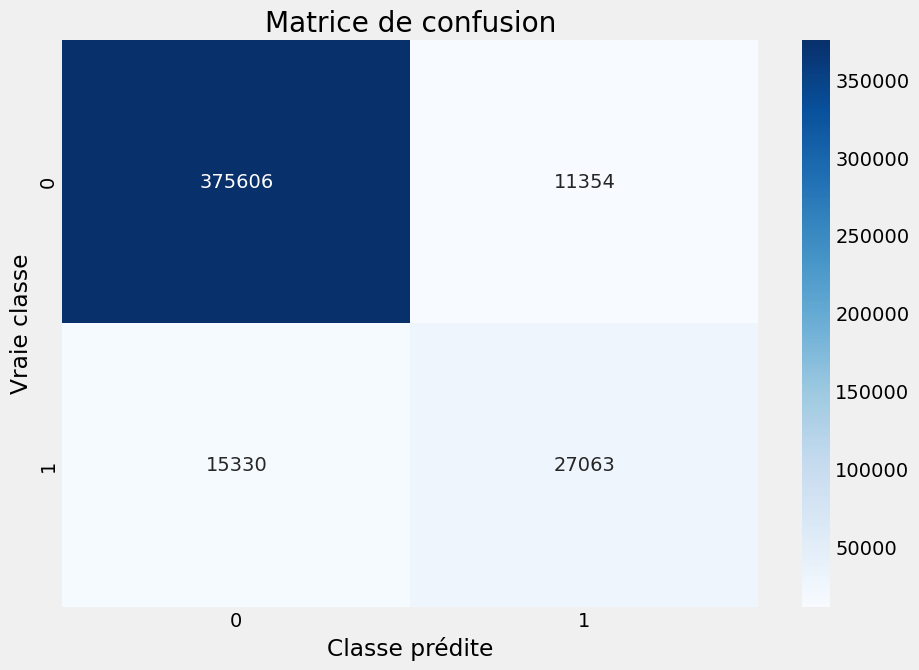

In [149]:
import seaborn as sns
# Affichage de la matrice de confusion
conf_matrix=confusion_matrix(y_test, pred_test1)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion")
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')
plt.show()

In [95]:
# Afficher le rapport de classification 'classification_report()'
print(classification_report(y_test,pred_test1))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97    386960
           1       0.70      0.64      0.67     42393

    accuracy                           0.94    429353
   macro avg       0.83      0.80      0.82    429353
weighted avg       0.94      0.94      0.94    429353



In [137]:
list_columns_after_transformation = \
          list(rf_clf_opt1.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_nominal_features)) +\
          categorical_ordinal_features + numerical_features

base_transformed = pd.DataFrame(data = preprocessor.fit_transform(X_train), columns = list_columns_after_transformation)
base_transformed.head()

,TRI_non,TRI_oui,TRI_Portée_Nationale_non,TRI_Portée_Nationale_oui,LbRegionHy_Côtiers Méditerranéens,LbRegionHy_L'Adour,LbRegionHy_L'Isère,LbRegionHy_La Charente,LbRegionHy_La Dordogne,LbRegionHy_La Durance,LbRegionHy_La Garonne,LbRegionHy_La Saône,LbRegionHy_La Seine de sa source au confluent de l'Oise (exclu),LbRegionHy_La Seine du confluent de l'Oise (inclus) à l'embouchure,LbRegionHy_Le Rhône (Saône-Isère-Durance exclues),LbRegionHy_Les bassins côtiers de l'embouchure de la Seine (exclu) à la limite du bassin Loire Bretagne,LbRegionHy_Les bassins côtiers de la limite du bassin Artois Picardie à l'embouchure de la Seine (exclu),LbRegionHy_Les fleuves côtiers,LbRegionHy_affluents du rhin,LbRegionHy_bassins côtiers du sud de la loire,LbRegionHy_bassins de la bretagne,LbRegionHy_l'Escaut et fleuves Côtiers se jetant dans la mer de la frontière belge à l'Embouchure de la Bresle,LbRegionHy_la loire de la maine (c) à la mer,LbRegionHy_la loire de la vienne (c) à la maine (nc),LbRegionHy_la loire de sa source à la vienne (nc),LbRegionHy_la meuse,LbRegionHy_le rhin,LbRegionHy_Îles Marines,CdRegionHy,TYPO,SWI_max_annuel,SWI_min_annuel,SWI_median_annuel,SWI_moyenne_annuelle,DistancePlusProche,Distance_2eme_CoursEauProche,Distance_3eme_CoursEauProche,Altitude_moyenne,Territoire_artificialises,Territoire_agricoles,Zone_agrico_heterogene,Zone_humide_interieure,Zone_humides_cotiere,Eaux_continentales,Perimetre_irrigue,RM_Y,Rm_Y,R_sdY,RM_M,Rm_M,R_sdM,R_M,R_m,R_sd,R_mean,R_median,Q_M,Q_m,Q_sd,Q_mean,H_M,H_m,H_sd,H_mean
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0,-1.0,0.000384,0.000195,0.000326,0.000310,0.071891,0.179326,0.262641,0.276553,0.000000,0.065545,0.000000,0.0,0.000000,0.0,0.0,0.010684,0.000000e+00,0.001342,0.010684,0.001342,0.002446,0.016073,-2.424094e-09,0.001312,0.015723,0.015773,0.005206,0.001301,0.000547,0.004924,0.842034,0.108087,0.095787,0.286337
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0,-1.0,0.000249,0.000061,0.000171,0.000163,0.109122,0.144379,0.287511,0.015053,0.029692,0.179459,0.104280,0.0,0.000000,0.0,0.0,0.019925,-1.144394e-09,0.001776,0.019925,0.001124,0.004087,0.053059,-2.288788e-09,0.002121,0.047859,0.048771,0.004915,0.001229,0.000495,0.004713,0.889023,0.006758,0.083897,0.186006
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,-1.0,0.000129,0.000040,0.000099,0.000088,0.054583,0.082837,0.121138,0.018776,0.004129,0.073303,0.000000,0.0,0.000000,0.0,0.0,0.003651,-4.114538e-10,0.000408,0.003651,0.000174,0.000815,0.006275,-8.229075e-10,0.000388,0.005680,0.005572,0.001767,0.000572,0.000116,0.001738,0.845235,0.058370,0.051216,0.499151
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,-1.0,0.000112,0.000035,0.000083,0.000077,0.356926,0.480900,0.580071,0.009436,0.063668,0.158607,0.006327,0.0,0.000161,0.0,0.0,0.006760,-8.271177e-10,0.000633,0.006760,0.000102,0.001329,0.018510,-8.271177e-10,0.000612,0.011716,0.011733,0.001776,0.000444,0.000352,0.001659,0.514361,-0.001207,0.051956,0.086794
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,-1.0,0.000291,0.000097,0.000198,0.000195,0.008297,0.025820,0.284174,0.140902,0.017873,0.217768,0.034657,0.0,0.000000,0.0,0.0,0.008973,-1.025198e-09,0.001281,0.008973,0.002336,0.001591,0.013595,-2.050396e-09,0.001106,0.013265,0.013228,0.004403,0.001101,0.000463,0.004165,0.850957,0.188333,0.084568,0.286737


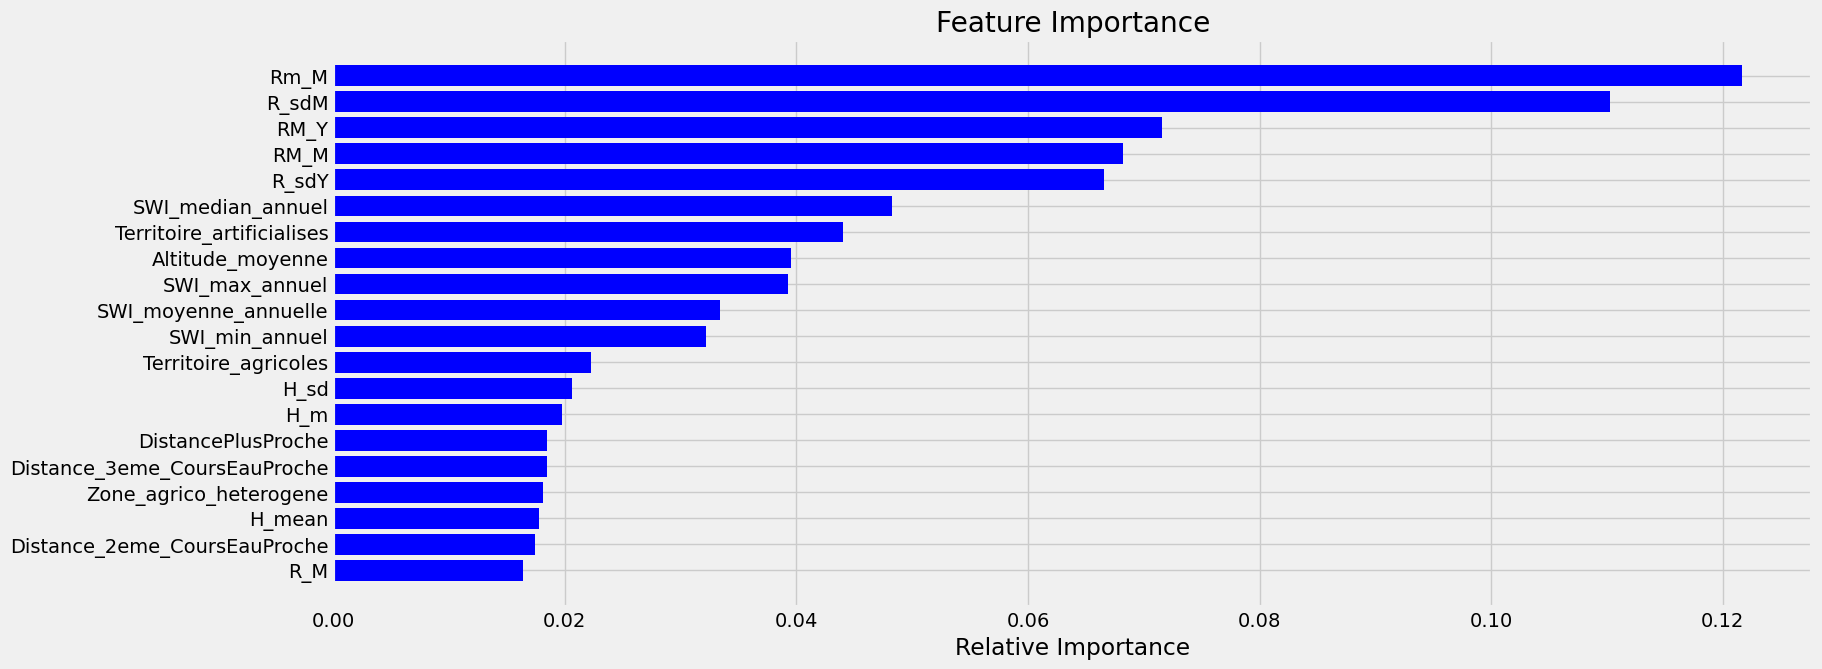

In [144]:
importances = rf_opt_pipeline1['classifier'].feature_importances_
indices = np.argsort(importances)
liste_variables = list(base_transformed.columns)

plt.subplots(figsize = (17, 7))
plt.figure(1)
plt.title('Feature Importance')
plt.barh(range(len(indices[-20:])), importances[indices][-20:], color = 'blue', align = 'center')
plt.yticks(range(len(indices[-20:])), [liste_variables[i] for i in indices][-20:])
plt.xlabel('Relative Importance');

In [ ]:
# courbe ROC avec scikitplot
nb = rf_opt_pipeline1.fit(X_test, y_test)
y_probas = nb.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (10, 10), plot_micro = False, plot_macro = False, classes_to_plot = 0)
plt.show()

In [96]:
#affichage des probas de prédictions de chaque classe pour les observations
pred_test1_prob = rf_opt_pipeline1.predict_proba(X_test)
pred_test1_prob

array([[0.64582512, 0.35417488],
       [0.94982213, 0.05017787],
       [0.66767708, 0.33232292],
       ...,
       [0.8365629 , 0.1634371 ],
       [0.89025851, 0.10974149],
       [0.89432616, 0.10567384]])

In [97]:
#prédire les 0 avec un seuil de proba supérieur à 0.4 pour la classe 1
threshold = 0.4
predicted_class1 = (pred_test1_prob[:, 1] >= threshold).astype(int)
predicted_class1

array([0, 0, 0, ..., 0, 0, 0])

In [94]:
print(confusion_matrix(y_test, predicted_class1))

[[362526  34412]
 [ 15896  26991]]


In [95]:
print(classification_report(y_test,predicted_class1))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94    396938
           1       0.44      0.63      0.52     42887

    accuracy                           0.89    439825
   macro avg       0.70      0.77      0.73    439825
weighted avg       0.91      0.89      0.89    439825



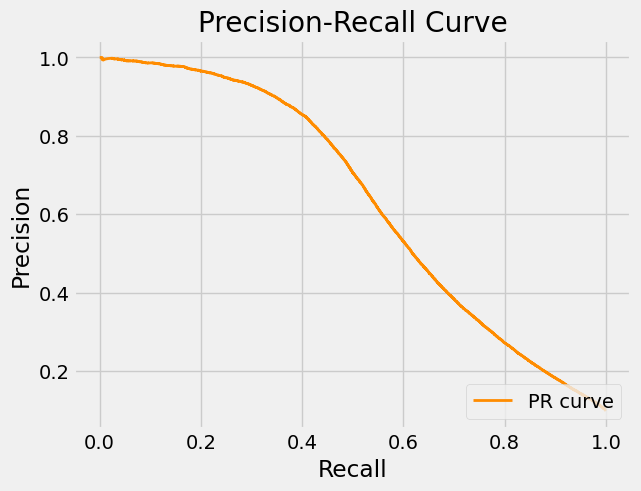

In [53]:
#courbe Précision-Rappel
from sklearn.metrics import precision_recall_curve

y_true = y_test
y_scores1 = pred_test1_prob[:, 1]
# Calculer la précision, le rappel et les seuils de décision pour différentes valeurs de seuil
precision, recall, thresholds = precision_recall_curve(y_true, y_scores1)

# Tracer la courbe PR
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

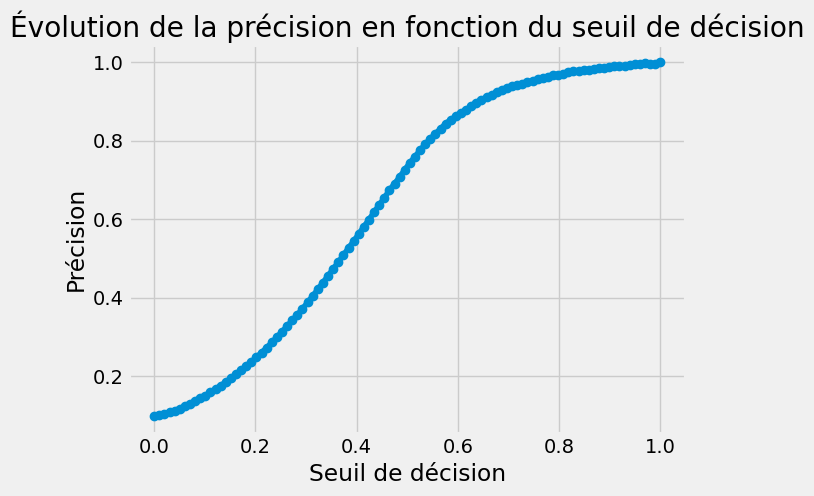

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score

# Faites des prédictions avec votre modèle sur l'ensemble de données de test
#y_probas = rf_opt_pipeline1.predict_proba(X_test)
#y_pred = rf_opt_pipeline.predict(X_test)

# Calculez la précision pour chaque seuil de décision entre 0 et 1
thresholds = np.linspace(0, 1, 100)  # Créez 100 valeurs de seuil de décision entre 0 et 1
precisions = []

for threshold in thresholds:
    # Ajustez les prédictions en fonction du seuil de décision
    y_pred_adjusted = (pred_test1_prob[:, 1] >= threshold).astype(int)
    
    # Calculez la précision pour les prédictions ajustées
    precision = precision_score(y_test, y_pred_adjusted)
    precisions.append(precision)

# Tracer l'évolution de la précision en fonction du seuil de décision
plt.plot(thresholds, precisions, marker='o', linestyle='-')
plt.xlabel('Seuil de décision')
plt.ylabel('Précision')
plt.title('Évolution de la précision en fonction du seuil de décision')
plt.grid(True)
plt.show()


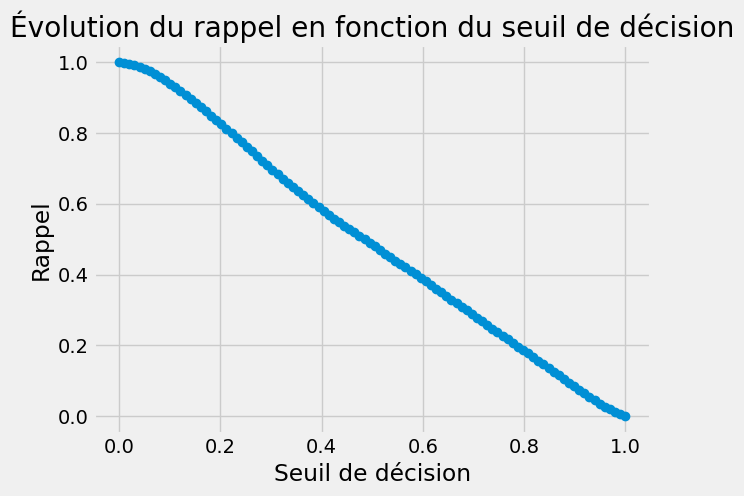

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score

# Faites des prédictions avec votre modèle sur l'ensemble de données de test
#y_probas = rf_opt_pipeline.predict_proba(X_test)
#y_pred = rf_opt_pipeline.predict(X_test)

# Calculez le rappel pour chaque seuil de décision entre 0 et 1
thresholds = np.linspace(0, 1, 100)  # Créez 100 valeurs de seuil de décision entre 0 et 1
recalls = []

for threshold in thresholds:
    # Ajustez les prédictions en fonction du seuil de décision
    y_pred_adjusted = (pred_test1_prob[:, 1] >= threshold).astype(int)
    
    # Calculez le rappel pour les prédictions ajustées
    recall = recall_score(y_test, y_pred_adjusted)
    recalls.append(recall)

# Tracer l'évolution du rappel en fonction du seuil de décision
plt.plot(thresholds, recalls, marker='o', linestyle='-')
plt.xlabel('Seuil de décision')
plt.ylabel('Rappel')
plt.title('Évolution du rappel en fonction du seuil de décision')
plt.grid(True)
plt.show()


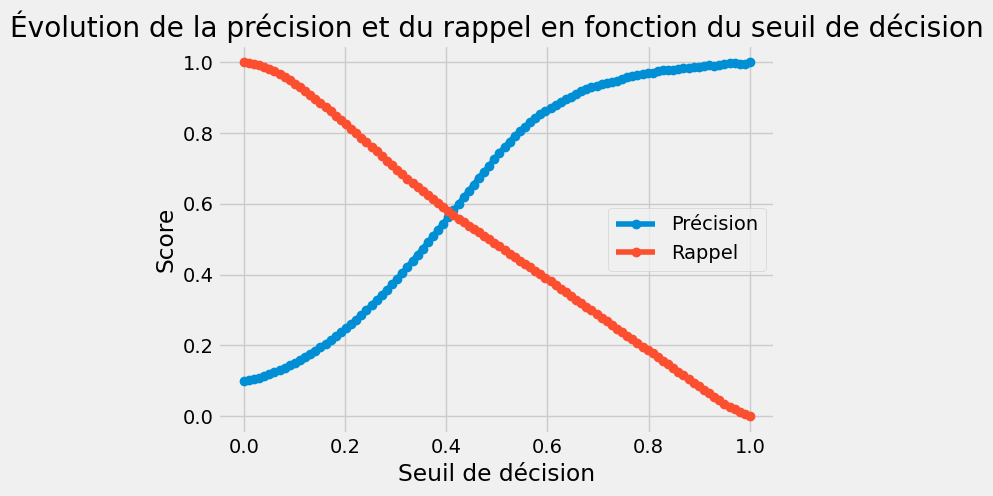

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

# Faites des prédictions avec votre modèle sur l'ensemble de données de test
#y_probas = rf_opt_pipeline.predict_proba(X_test)

# Calculez la précision et le rappel pour chaque seuil de décision entre 0 et 1
thresholds = np.linspace(0, 1, 100)  # Créez 100 valeurs de seuil de décision entre 0 et 1
precisions = []
recalls = []

for threshold in thresholds:
    # Ajustez les prédictions en fonction du seuil de décision
    y_pred_adjusted = (pred_test1_prob[:, 1] >= threshold).astype(int)
    
    # Calculez la précision et le rappel pour les prédictions ajustées
    precision = precision_score(y_test, y_pred_adjusted)
    recall = recall_score(y_test, y_pred_adjusted)
    precisions.append(precision)
    recalls.append(recall)

# Tracer les courbes de précision et de rappel sur le même graphique
plt.plot(thresholds, precisions, label='Précision', marker='o', linestyle='-')
plt.plot(thresholds, recalls, label='Rappel', marker='o', linestyle='-')
plt.xlabel('Seuil de décision')
plt.ylabel('Score')
plt.title('Évolution de la précision et du rappel en fonction du seuil de décision')
plt.legend()
plt.grid(True)
plt.show()

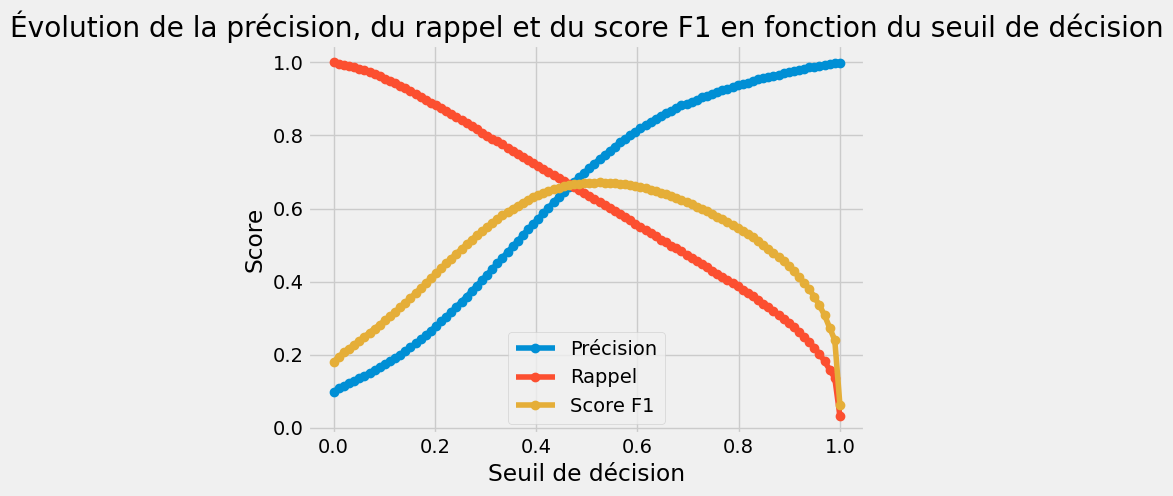

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
# Calculez la précision, le rappel et le score F1 pour chaque seuil de décision entre 0 et 1
thresholds = np.linspace(0, 1, 100)  # Créez 100 valeurs de seuil de décision entre 0 et 1
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    # Ajustez les prédictions en fonction du seuil de décision
    y_pred_adjusted = (pred_test1_prob[:, 1] >= threshold).astype(int)
    
    # Calculez la précision, le rappel et le score F1 pour les prédictions ajustées
    precision = precision_score(y_test, y_pred_adjusted)
    recall = recall_score(y_test, y_pred_adjusted)
    f1 = f1_score(y_test, y_pred_adjusted)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Tracer les courbes de précision, de rappel et de score F1 sur le même graphique
plt.plot(thresholds, precisions, label='Précision', marker='o', linestyle='-')
plt.plot(thresholds, recalls, label='Rappel', marker='o', linestyle='-')
plt.plot(thresholds, f1_scores, label='Score F1', marker='o', linestyle='-')
plt.xlabel('Seuil de décision')
plt.ylabel('Score')
plt.title('Évolution de la précision, du rappel et du score F1 en fonction du seuil de décision')
plt.legend()
plt.grid(True)
plt.show()

Modèles sans attribuer de poids sur les classes

In [99]:
classifier = RandomForestClassifier(n_estimators = 22, max_features = 43, min_samples_leaf = 5, max_depth = 26, random_state = 42)
classifier

RandomForestClassifier(max_depth=26, max_features=43, min_samples_leaf=5,
                       n_estimators=22, random_state=42)

In [60]:
param_distributions = {'classifier__max_depth': range(1, 30),
                       'classifier__min_samples_leaf': range(1, 6),
                       'classifier__n_estimators' : range(1, 60),
                       'classifier__max_features' : range(1, 60)}

# Nombre de combinaisons de paramètres à tester
n_iter_search = 50

# Création du Pipeline
rs_pipeline2 = Pipeline([('preprocessor', preprocessor), ('classifier', classifier)])

# Création du RandomizedSearchCV
rs_model2 = RandomizedSearchCV(rs_pipeline2, param_distributions, n_iter=n_iter_search, scoring = 'f1', cv = 3, n_jobs = -1, verbose = 3)

# Fitting du modèle sur les données d'entrainement
rs_clf2 = rs_model2.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [61]:
# Affichage du meilleur modèle
print('Les meilleurs paramètres sont :', rs_model2.best_params_)
print('Le meilleur modèle a un score de :', round(rs_model2.best_score_, 3))
print()

# Prédiction des données de test
pred_test2 = rs_model2.predict(X_test)

# Affichage des metrics
print('** Score sur les données de test **')
print('Precision :', round(precision_score(y_test, pred_test2), 3))
print('Recall :', round(recall_score(y_test, pred_test2), 3))
print('F1 Score :', round(f1_score(y_test, pred_test2), 3))

Les meilleurs paramètres sont : {'classifier__n_estimators': 8, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 45, 'classifier__max_depth': 25}
Le meilleur modèle a un score de : 0.434

** Score sur les données de test **
Precision : 0.845
Recall : 0.32
F1 Score : 0.464


In [100]:
classifier = RandomForestClassifier(n_estimators = 8, max_features = 45, min_samples_leaf = 2, max_depth = 25, random_state = 42)
classifier

rf_opt_pipeline2 = Pipeline([('preprocessor', preprocessor), ('classifier', classifier)])

In [101]:
# Fit sur les données d'entrainement avec les paramètres optimaux
rf_clf_opt2 = rf_opt_pipeline2.fit(X_train, y_train)

In [102]:
# prédiction sur les données de test
pred_test2 = rf_opt_pipeline2.predict(X_test)

# Inspectez pred_test et vérifiez qu'il est bien composé que de 0 et de 1.
print(np.unique(pred_test2)) 

[0 1]


In [103]:
# Afficher la matrice de confusion
print(confusion_matrix(y_test, pred_test2))

[[383965   2995]
 [ 22464  19929]]


In [104]:
# Afficher le rapport de classification 'classification_report()'
print(classification_report(y_test,pred_test2))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97    386960
           1       0.87      0.47      0.61     42393

    accuracy                           0.94    429353
   macro avg       0.91      0.73      0.79    429353
weighted avg       0.94      0.94      0.93    429353



In [105]:
#affichage des probas de prédictions de chaque classe pour les observations
pred_test2_prob = rf_opt_pipeline2.predict_proba(X_test)
pred_test2_prob

array([[0.60416667, 0.39583333],
       [0.97701933, 0.02298067],
       [1.        , 0.        ],
       ...,
       [0.94402966, 0.05597034],
       [0.95353854, 0.04646146],
       [0.98391179, 0.01608821]])

In [68]:
#prédire les 0 avec un seuil de proba supérieur à 0.3 pour la classe 1
threshold = 0.4
predicted_class2 = (pred_test2_prob[:, 1] >= threshold).astype(int)
predicted_class2

array([0, 0, 0, ..., 0, 0, 0])

In [115]:
print(confusion_matrix(y_test, predicted_class2))

[[386418  10520]
 [ 24618  18269]]


In [116]:
print(classification_report(y_test,predicted_class2))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96    396938
           1       0.63      0.43      0.51     42887

    accuracy                           0.92    439825
   macro avg       0.79      0.70      0.73    439825
weighted avg       0.91      0.92      0.91    439825



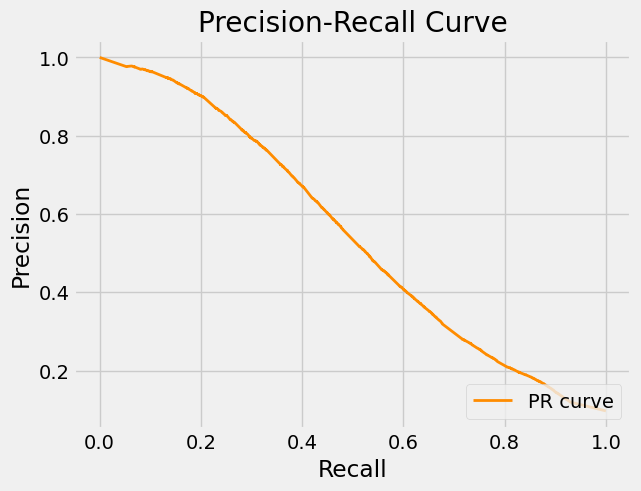

In [118]:
#courbe Précision-Rappel
from sklearn.metrics import precision_recall_curve

y_true = y_test
y_scores2 = pred_test2_prob[:, 1]
# Calculer la précision, le rappel et les seuils de décision pour différentes valeurs de seuil
precision, recall, thresholds = precision_recall_curve(y_true, y_scores2)

# Tracer la courbe PR
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

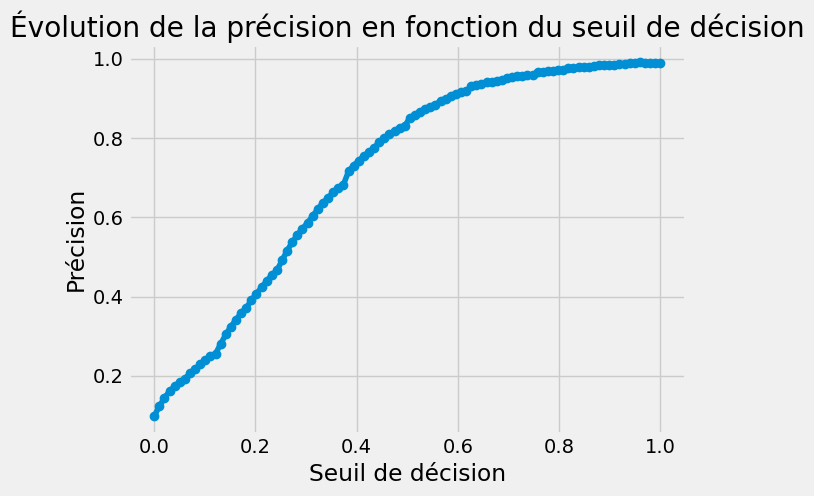

In [69]:
# Faites des prédictions avec votre modèle sur l'ensemble de données de test
#y_probas = rf_opt_pipeline1.predict_proba(X_test)
#y_pred = rf_opt_pipeline.predict(X_test)

# Calculez la précision pour chaque seuil de décision entre 0 et 1
thresholds = np.linspace(0, 1, 100)  # Créez 100 valeurs de seuil de décision entre 0 et 1
precisions2 = []

for threshold in thresholds:
    # Ajustez les prédictions en fonction du seuil de décision
    y_pred_adjusted2 = (pred_test2_prob[:, 1] >= threshold).astype(int)
    
    # Calculez la précision pour les prédictions ajustées
    precision2 = precision_score(y_test, y_pred_adjusted2)
    precisions2.append(precision2)

# Tracer l'évolution de la précision en fonction du seuil de décision
plt.plot(thresholds, precisions2, marker='o', linestyle='-')
plt.xlabel('Seuil de décision')
plt.ylabel('Précision')
plt.title('Évolution de la précision en fonction du seuil de décision')
plt.grid(True)
plt.show()


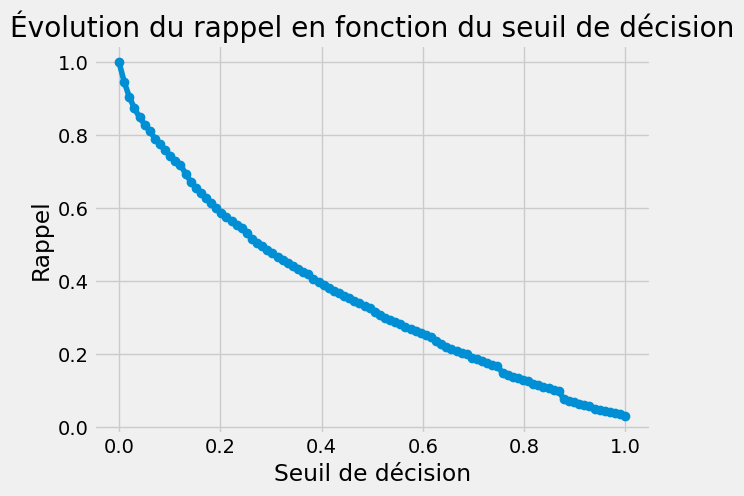

In [70]:
# Faites des prédictions avec votre modèle sur l'ensemble de données de test
#y_probas = rf_opt_pipeline.predict_proba(X_test)
#y_pred = rf_opt_pipeline.predict(X_test)

# Calculez le rappel pour chaque seuil de décision entre 0 et 1
thresholds = np.linspace(0, 1, 100)  # Créez 100 valeurs de seuil de décision entre 0 et 1
recalls2 = []

for threshold in thresholds:
    # Ajustez les prédictions en fonction du seuil de décision
    y_pred_adjusted2 = (pred_test2_prob[:, 1] >= threshold).astype(int)
    
    # Calculez le rappel pour les prédictions ajustées
    recall2 = recall_score(y_test, y_pred_adjusted2)
    recalls2.append(recall2)

# Tracer l'évolution du rappel en fonction du seuil de décision
plt.plot(thresholds, recalls2, marker='o', linestyle='-')
plt.xlabel('Seuil de décision')
plt.ylabel('Rappel')
plt.title('Évolution du rappel en fonction du seuil de décision')
plt.grid(True)
plt.show()


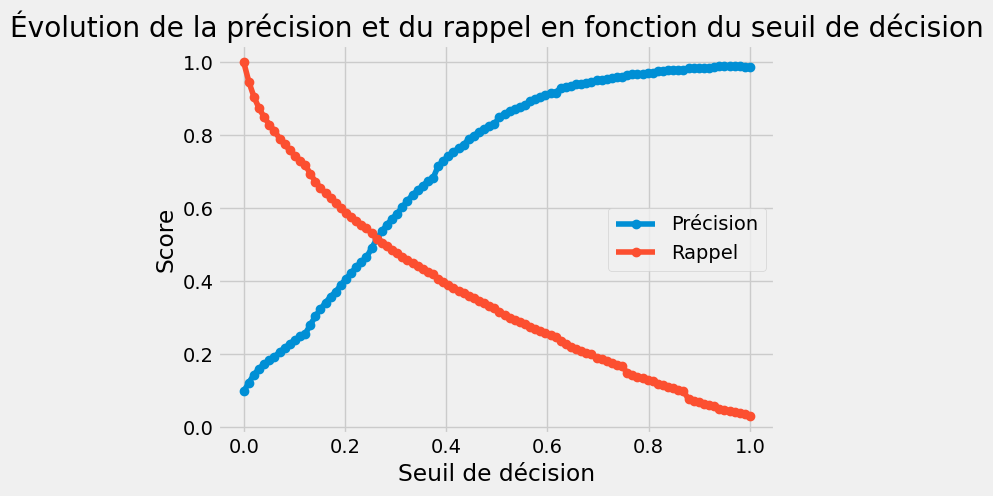

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

# Faites des prédictions avec votre modèle sur l'ensemble de données de test
#y_probas = rf_opt_pipeline.predict_proba(X_test)

# Calculez la précision et le rappel pour chaque seuil de décision entre 0 et 1
thresholds = np.linspace(0, 1, 100)  # Créez 100 valeurs de seuil de décision entre 0 et 1
precisions2 = []
recalls2 = []

for threshold in thresholds:
    # Ajustez les prédictions en fonction du seuil de décision
    y_pred_adjusted2 = (pred_test2_prob[:, 1] >= threshold).astype(int)
    
    # Calculez la précision et le rappel pour les prédictions ajustées
    precision2 = precision_score(y_test, y_pred_adjusted2)
    recall2 = recall_score(y_test, y_pred_adjusted2)
    precisions2.append(precision2)
    recalls2.append(recall2)

# Tracer les courbes de précision et de rappel sur le même graphique
plt.plot(thresholds, precisions2, label='Précision', marker='o', linestyle='-')
plt.plot(thresholds, recalls2, label='Rappel', marker='o', linestyle='-')
plt.xlabel('Seuil de décision')
plt.ylabel('Score')
plt.title('Évolution de la précision et du rappel en fonction du seuil de décision')
plt.legend()
plt.grid(True)
plt.show()


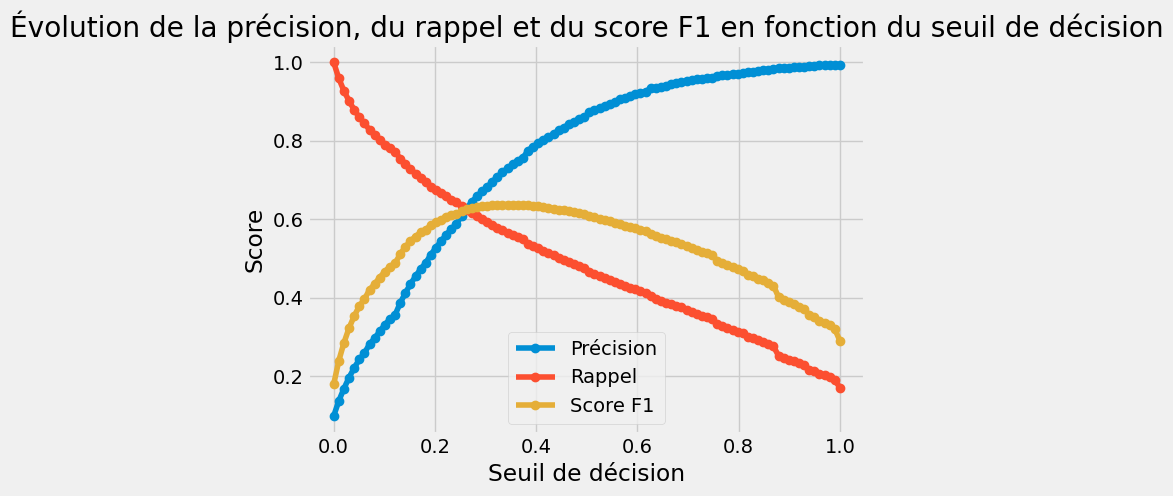

In [106]:
from sklearn.metrics import f1_score
# Calculez la précision, le rappel et le score F1 pour chaque seuil de décision entre 0 et 1
thresholds = np.linspace(0, 1, 100)  # Créez 100 valeurs de seuil de décision entre 0 et 1
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    # Ajustez les prédictions en fonction du seuil de décision
    y_pred_adjusted = (pred_test2_prob[:, 1] >= threshold).astype(int)
    
    # Calculez la précision, le rappel et le score F1 pour les prédictions ajustées
    precision = precision_score(y_test, y_pred_adjusted)
    recall = recall_score(y_test, y_pred_adjusted)
    f1 = f1_score(y_test, y_pred_adjusted)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Tracer les courbes de précision, de rappel et de score F1 sur le même graphique
plt.plot(thresholds, precisions, label='Précision', marker='o', linestyle='-')
plt.plot(thresholds, recalls, label='Rappel', marker='o', linestyle='-')
plt.plot(thresholds, f1_scores, label='Score F1', marker='o', linestyle='-')
plt.xlabel('Seuil de décision')
plt.ylabel('Score')
plt.title('Évolution de la précision, du rappel et du score F1 en fonction du seuil de décision')
plt.legend()
plt.grid(True)
plt.show()

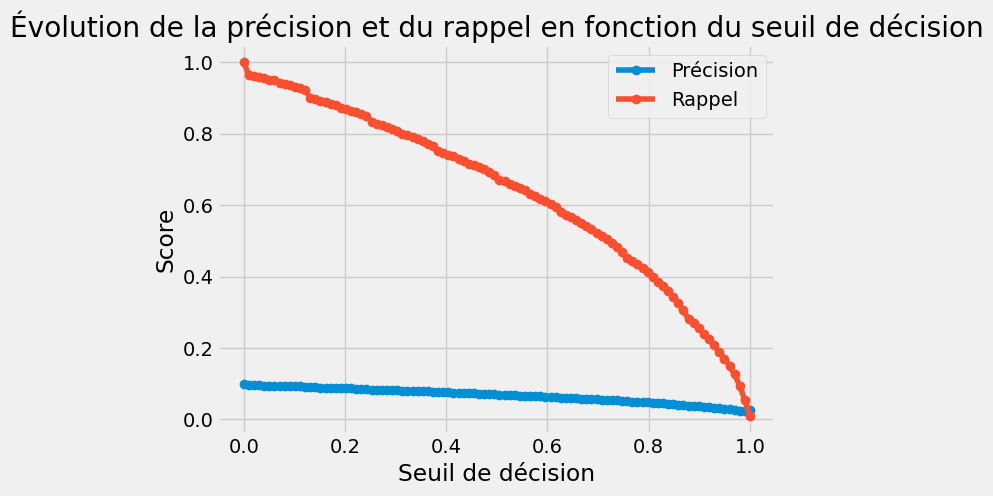

In [72]:
#Sur la classe 0
# Faites des prédictions avec votre modèle sur l'ensemble de données de test
#y_probas = rf_opt_pipeline.predict_proba(X_test)

# Calculez la précision et le rappel pour chaque seuil de décision entre 0 et 1
thresholds = np.linspace(0, 1, 100)  # Créez 100 valeurs de seuil de décision entre 0 et 1
precisions2pour0 = []
recalls2pour0 = []

for threshold in thresholds:
    # Ajustez les prédictions en fonction du seuil de décision
    y_pred_adjusted2_0 = (pred_test2_prob[:, 0] >= threshold).astype(int)
    
    # Calculez la précision et le rappel pour les prédictions ajustées
    precision2_0 = precision_score(y_test, y_pred_adjusted2_0)
    recall2_0 = recall_score(y_test, y_pred_adjusted2_0)
    precisions2pour0.append(precision2_0)
    recalls2pour0.append(recall2_0)

# Tracer les courbes de précision et de rappel sur le même graphique
plt.plot(thresholds, precisions2pour0, label='Précision', marker='o', linestyle='-')
plt.plot(thresholds, recalls2pour0, label='Rappel', marker='o', linestyle='-')
plt.xlabel('Seuil de décision')
plt.ylabel('Score')
plt.title('Évolution de la précision et du rappel en fonction du seuil de décision')
plt.legend()
plt.grid(True)
plt.show()

## Modèle CATBoost

In [41]:
!pip3 install catboost

In [42]:
# Importation des bibliothèques nécessaires
from catboost import CatBoostClassifier

In [43]:
# Création du classifier CATBoost
classifier_boost = CatBoostClassifier(iterations=100, learning_rate=0.1, class_weights={0: 0.10, 1: 0.90} , depth=14, loss_function='Logloss')
classifier_boost


In [44]:
# création du pipeline pour CATBoost
catb_pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                                ('classifier', classifier_boost)])
catb_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_nominal',
                                                  OneHotEncoder(),
                                                  ['TRI',
                                                   'TRI_Portée_Nationale',
                                                   'LbRegionHy']),
                                                 ('cat_ordinal',
                                                  OrdinalEncoder(categories=[['A',
                                                                              'B',
                                                                              'D',
                                                                              'E',
                                                                              'F',
                                                                              'G',
                                                                              'H',
                                                                              'I',
                                                                              'J',
                                                                              'K',
                                                                              'L',
                                                                              'M',
                                                                              'N',
                                                                              'O',
                                                                              'P',
                                                                              'Q',
                                                                              'R',
                                                                              'S',
                                                                              'U',
                                                                              'V',
                                                                              'W',
                                                                              'X',
                                                                              'Y',
                                                                              'Z'],
                                                                             [0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              9]],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_valu...
                                                   'Territoire_artificialises',
                                                   'Territoire_agricoles',
                                                   'Zone_agrico_heterogene',
                                                   'Zone_humide_interieure',
                                                   'Zone_humides_cotiere',
                                                   'Eaux_continentales',
                                                   'Perimetre_irrigue', 'RM_Y',
                                              

In [111]:
# To do : Séparation base test / apprentissage
# Variable cible : target
y = CATNAT_NON_CATNAT['Arrêté']

# Variables explicatives : predictor variables
X = CATNAT_NON_CATNAT.drop(columns=['Arrêté', 'Unnamed: 0', 'Insee', 'Année', 'NUMERO', 'Commune', 'DateDébut', 'DateFin', 'DateArrêté', 'DateJO', 'Franchise', 'Décision', 'Nom_TRI', 
                                                'Longitudes', 'Latitudes', 'SWI_UNIF_MENS3','Quantile_SWI_Maille_Pct', 'Quantile_SWI_Mailles_Total_Pct', 'durée_inondation', 'era_RM_M', 'era_Rm_M', 'era_R_sdM', 'nb_jours_pluvieux/3j_avant', 'nb_jours_pluvieux/7j_avant',
                                                'era_precip', 'era_rol3j', 'era_rol7j', 'era_rol10j', 'era_rol30j', 'Q_median', 'H_median'])

# Découpage en données de train et de test (random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Fit sur les données d'entrainement
#class_weights = [0.10, 0.90]
#catb_clf = catb_pipeline.fit(X_train, y_train)

In [31]:
list_columns_after_transformation = \
          list(catb_clf.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_nominal_features)) +\
          categorical_ordinal_features + numerical_features

base_transformed = pd.DataFrame(data = preprocessor.fit_transform(X_train), columns = list_columns_after_transformation)
base_transformed.head(2)

,TRI_non,TRI_oui,TRI_Portée_Nationale_non,TRI_Portée_Nationale_oui,LbRegionHy_Côtiers Méditerranéens,LbRegionHy_L'Adour,LbRegionHy_L'Isère,LbRegionHy_La Charente,LbRegionHy_La Dordogne,LbRegionHy_La Durance,LbRegionHy_La Garonne,LbRegionHy_La Saône,LbRegionHy_La Seine de sa source au confluent de l'Oise (exclu),LbRegionHy_La Seine du confluent de l'Oise (inclus) à l'embouchure,LbRegionHy_Le Rhône (Saône-Isère-Durance exclues),LbRegionHy_Les bassins côtiers de l'embouchure de la Seine (exclu) à la limite du bassin Loire Bretagne,LbRegionHy_Les bassins côtiers de la limite du bassin Artois Picardie à l'embouchure de la Seine (exclu),LbRegionHy_Les fleuves côtiers,LbRegionHy_affluents du rhin,LbRegionHy_bassins côtiers du sud de la loire,LbRegionHy_bassins de la bretagne,LbRegionHy_l'Escaut et fleuves Côtiers se jetant dans la mer de la frontière belge à l'Embouchure de la Bresle,LbRegionHy_la loire de la maine (c) à la mer,LbRegionHy_la loire de la vienne (c) à la maine (nc),LbRegionHy_la loire de sa source à la vienne (nc),LbRegionHy_la meuse,LbRegionHy_le rhin,LbRegionHy_Îles Marines,CdRegionHy,TYPO,SWI_max_annuel,SWI_min_annuel,SWI_median_annuel,SWI_moyenne_annuelle,DistancePlusProche,Distance_2eme_CoursEauProche,Distance_3eme_CoursEauProche,Altitude_moyenne,Territoire_artificialises,Territoire_agricoles,Zone_agrico_heterogene,Zone_humide_interieure,Zone_humides_cotiere,Eaux_continentales,Perimetre_irrigue,RM_Y,Rm_Y,R_sdY,RM_M,Rm_M,R_sdM,R_M,R_m,R_sd,R_mean,R_median
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0,-1.0,0.000886,0.000450,0.000752,0.000716,0.165966,0.413986,0.606324,0.638441,0.000000,0.151315,0.0000,0.0,0.0,0.0,0.0,0.024665,0.000000e+00,0.003098,0.024665,0.003099,0.005646,0.024665,0.000000e+00,0.003098,0.022793,0.023056
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0,-1.0,0.000620,0.000151,0.000426,0.000406,0.271758,0.359561,0.716018,0.037487,0.073944,0.446924,0.2597,0.0,0.0,0.0,0.0,0.049620,-2.850001e-09,0.004423,0.049620,0.002799,0.010178,0.049620,-2.850001e-09,0.004423,0.037043,0.034828


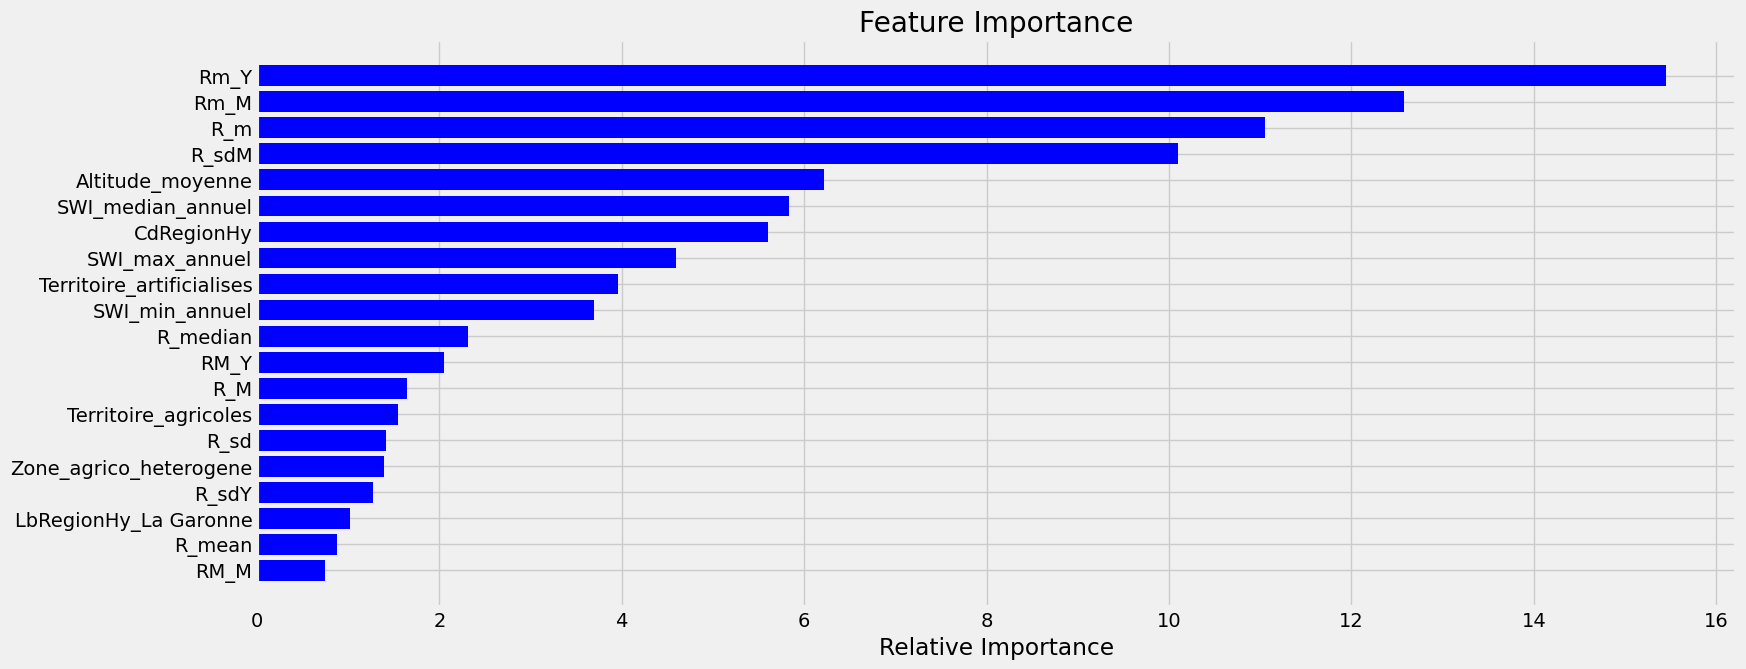

In [32]:
importances = catb_pipeline['classifier'].feature_importances_
indices = np.argsort(importances)
liste_variables = list(base_transformed.columns)

plt.subplots(figsize = (17, 7))
plt.figure(1)
plt.title('Feature Importance')
plt.barh(range(len(indices[-20:])), importances[indices][-20:], color = 'b', align = 'center')
plt.yticks(range(len(indices[-20:])), [liste_variables[i] for i in indices][-20:])
plt.xlabel('Relative Importance');

Evaluation du modèle

In [267]:
# prédiction sur les données de test
pred_test = catb_pipeline.predict(X_test)

# Inspectez pred_test et vérifiez qu'il est bien composé que de 0 et de 1.
print(np.unique(pred_test)) 

[0 1]


In [268]:
# Afficher la matrice de confusion
print(confusion_matrix(y_test, pred_test))

[[94233 24849]
 [ 4675  8191]]


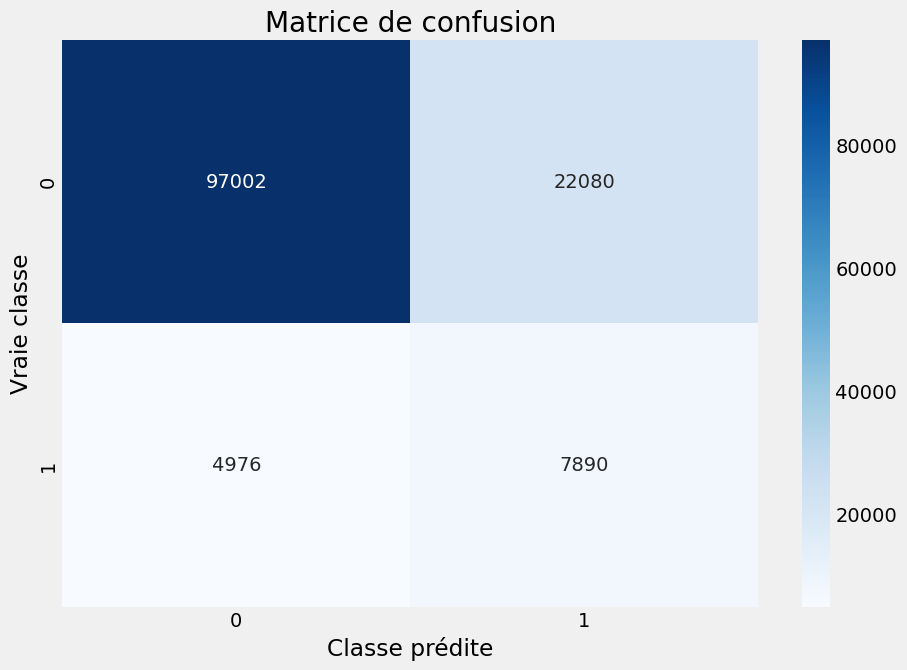

In [277]:
import seaborn as sns
# Affichage de la matrice de confusion
conf_matrix=confusion_matrix(y_test, pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion")
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')
plt.show()


In [269]:
# Afficher le rapport de classification 'classification_report()'
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86    119082
           1       0.25      0.64      0.36     12866

    accuracy                           0.78    131948
   macro avg       0.60      0.71      0.61    131948
weighted avg       0.88      0.78      0.82    131948



In [270]:
# Calculez le F1-score sur les données de test
f1_test = classification_report(y_test, pred_test, output_dict=True)['1']['f1-score']
print('F1 Score test :', round(f1_test, 3))

F1 Score test : 0.357


0:	learn: 0.6705777	total: 2.39s	remaining: 3m 56s
1:	learn: 0.6503254	total: 5.09s	remaining: 4m 9s
2:	learn: 0.6370192	total: 7.54s	remaining: 4m 3s
3:	learn: 0.6230065	total: 10.1s	remaining: 4m 2s
4:	learn: 0.6099015	total: 12.6s	remaining: 4m
5:	learn: 0.5980623	total: 15.4s	remaining: 4m
6:	learn: 0.5882737	total: 17.8s	remaining: 3m 56s
7:	learn: 0.5807350	total: 20.3s	remaining: 3m 53s
8:	learn: 0.5740542	total: 22.7s	remaining: 3m 49s
9:	learn: 0.5688523	total: 25.4s	remaining: 3m 48s
10:	learn: 0.5631129	total: 27.9s	remaining: 3m 45s
11:	learn: 0.5563444	total: 30.4s	remaining: 3m 42s
12:	learn: 0.5471138	total: 32.8s	remaining: 3m 39s
13:	learn: 0.5414459	total: 35.4s	remaining: 3m 37s
14:	learn: 0.5356775	total: 37.9s	remaining: 3m 34s
15:	learn: 0.5308738	total: 40.4s	remaining: 3m 31s
16:	learn: 0.5266563	total: 42.9s	remaining: 3m 29s
17:	learn: 0.5223548	total: 45.5s	remaining: 3m 27s
18:	learn: 0.5189301	total: 48.1s	remaining: 3m 24s
19:	learn: 0.5148017	total: 50.5s

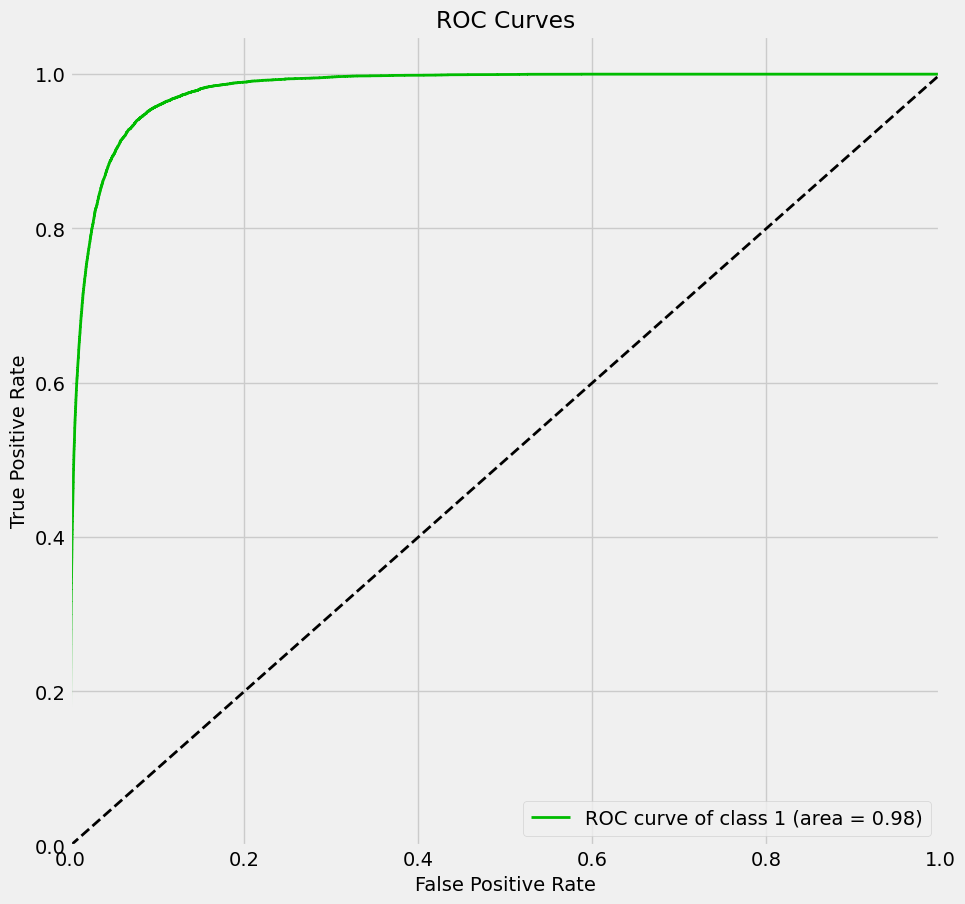

In [271]:
# courbe ROC avec scikitplot
nb = catb_pipeline.fit(X_test, y_test)
y_probas = nb.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (10, 10), plot_micro = False, plot_macro = False, classes_to_plot = 1)
plt.show()

Optimisation des paramètres

In [112]:
param_distributions = {'classifier__iterations': range(70, 130),
                       'classifier__learning_rate': np.linspace(0.05, 0.25, num=10),
                       'classifier__depth' : range(10, 40)}

# Nombre de combinaisons de paramètres à tester
n_iter_search = 20

# Création du Pipeline
catb_s_pipeline = Pipeline([('preprocessor', preprocessor), ('classifier', classifier_boost)])

# Création du RandomizedSearchCV
catb_s_model = RandomizedSearchCV(catb_s_pipeline, param_distributions, n_iter=n_iter_search, scoring = 'f1', cv = 3, n_jobs = -1, verbose = 3)

# Fitting du modèle sur les données d'entrainement
catb_s_model.fit(X_train, y_train);

Fitting 3 folds for each of 20 candidates, totalling 60 fits
0:	learn: 0.6635657	total: 13.7s	remaining: 29m 17s
1:	learn: 0.6400001	total: 27.6s	remaining: 29m 9s
2:	learn: 0.6208622	total: 41.3s	remaining: 28m 53s
3:	learn: 0.6059139	total: 55s	remaining: 28m 38s
4:	learn: 0.5921195	total: 1m 8s	remaining: 28m 15s
5:	learn: 0.5818010	total: 1m 22s	remaining: 28m 5s
6:	learn: 0.5734493	total: 1m 35s	remaining: 27m 49s
7:	learn: 0.5622070	total: 1m 49s	remaining: 27m 40s
8:	learn: 0.5552076	total: 2m 3s	remaining: 27m 31s
9:	learn: 0.5470627	total: 2m 17s	remaining: 27m 19s
10:	learn: 0.5414145	total: 2m 31s	remaining: 27m 7s
11:	learn: 0.5332245	total: 2m 45s	remaining: 26m 57s
12:	learn: 0.5263784	total: 3m	remaining: 26m 47s
13:	learn: 0.5195406	total: 3m 14s	remaining: 26m 34s
14:	learn: 0.5138761	total: 3m 28s	remaining: 26m 23s
15:	learn: 0.5074711	total: 3m 42s	remaining: 26m 9s
16:	learn: 0.5038264	total: 3m 56s	remaining: 25m 54s
17:	learn: 0.4981123	total: 4m 9s	remaining: 25

In [113]:
# Affichage du meilleur modèle
print('Les meilleurs paramètres sont :', catb_s_model.best_params_)
print('Le meilleur modèle a un score de :', round(catb_s_model.best_score_, 3))
print()

# Prédiction des données de test
pred_test = catb_s_model.predict(X_test)

# Affichage des metrics
print('** Score sur les données de test **')
print('Precision :', round(precision_score(y_test, pred_test), 3))
print('Recall :', round(recall_score(y_test, pred_test), 3))
print('F1 Score :', round(f1_score(y_test, pred_test), 3))

Les meilleurs paramètres sont : {'classifier__learning_rate': 0.07222222222222223, 'classifier__iterations': 129, 'classifier__depth': 16}
Le meilleur modèle a un score de : 0.594

** Score sur les données de test **
Precision : 0.485
Recall : 0.768
F1 Score : 0.594


In [45]:
classifier = CatBoostClassifier(iterations=129, learning_rate=0.07222222222222223, class_weights={0: 0.10, 1: 0.90} , depth=16, loss_function='Logloss')
classifier

catb_opt_pipeline1 = Pipeline([('preprocessor', preprocessor), ('classifier', classifier)])

In [46]:
# Fit sur les données d'entrainement avec les paramètres optimaux
catb_clf_opt1 = catb_opt_pipeline1.fit(X_train, y_train)

0:	learn: 0.6635657	total: 13.4s	remaining: 28m 30s
1:	learn: 0.6400001	total: 26.8s	remaining: 28m 19s
2:	learn: 0.6208622	total: 40.7s	remaining: 28m 28s
3:	learn: 0.6059139	total: 54.9s	remaining: 28m 34s
4:	learn: 0.5921195	total: 1m 9s	remaining: 28m 34s
5:	learn: 0.5818010	total: 1m 22s	remaining: 28m 11s
6:	learn: 0.5734493	total: 1m 36s	remaining: 27m 55s
7:	learn: 0.5622070	total: 1m 49s	remaining: 27m 36s
8:	learn: 0.5552076	total: 2m 2s	remaining: 27m 18s
9:	learn: 0.5470627	total: 2m 16s	remaining: 27m 9s
10:	learn: 0.5414145	total: 2m 31s	remaining: 27m 1s
11:	learn: 0.5332245	total: 2m 44s	remaining: 26m 48s
12:	learn: 0.5263784	total: 2m 58s	remaining: 26m 36s
13:	learn: 0.5195406	total: 3m 12s	remaining: 26m 24s
14:	learn: 0.5138761	total: 3m 27s	remaining: 26m 14s
15:	learn: 0.5074711	total: 3m 41s	remaining: 26m 3s
16:	learn: 0.5038264	total: 3m 55s	remaining: 25m 52s
17:	learn: 0.4981123	total: 4m 9s	remaining: 25m 40s
18:	learn: 0.4934819	total: 4m 24s	remaining: 25

In [47]:
# prédiction sur les données de test
pred_catb_test1 = catb_opt_pipeline1.predict(X_test)

# Inspectez pred_test et vérifiez qu'il est bien composé que de 0 et de 1.
print(np.unique(pred_catb_test1))

[0 1]


In [117]:
# Afficher la matrice de confusion
print(confusion_matrix(y_test, pred_catb_test1))

[[352328  34632]
 [  9839  32554]]


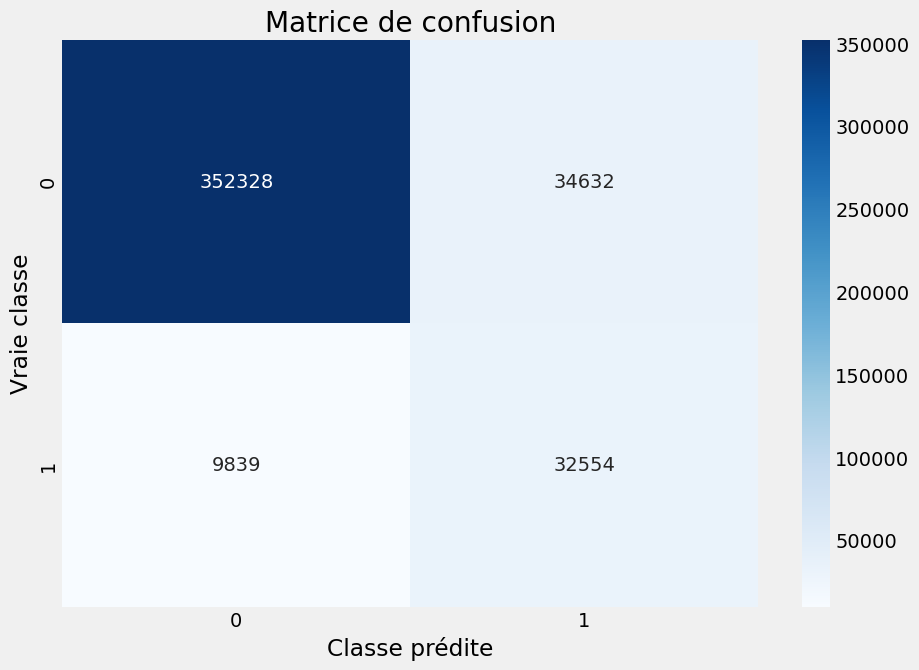

In [145]:
import seaborn as sns
# Affichage de la matrice de confusion
conf_matrix=confusion_matrix(y_test, pred_catb_test1)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion")
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')
plt.show()

In [118]:
# Afficher le rapport de classification 'classification_report()'
print(classification_report(y_test,pred_catb_test1))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94    386960
           1       0.48      0.77      0.59     42393

    accuracy                           0.90    429353
   macro avg       0.73      0.84      0.77    429353
weighted avg       0.92      0.90      0.91    429353



In [147]:
list_columns_after_transformation = \
          list(catb_clf_opt1.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_nominal_features)) +\
          categorical_ordinal_features + numerical_features

base_transformed = pd.DataFrame(data = preprocessor.fit_transform(X_train), columns = list_columns_after_transformation)
base_transformed.head(2)

,TRI_non,TRI_oui,TRI_Portée_Nationale_non,TRI_Portée_Nationale_oui,LbRegionHy_Côtiers Méditerranéens,LbRegionHy_L'Adour,LbRegionHy_L'Isère,LbRegionHy_La Charente,LbRegionHy_La Dordogne,LbRegionHy_La Durance,LbRegionHy_La Garonne,LbRegionHy_La Saône,LbRegionHy_La Seine de sa source au confluent de l'Oise (exclu),LbRegionHy_La Seine du confluent de l'Oise (inclus) à l'embouchure,LbRegionHy_Le Rhône (Saône-Isère-Durance exclues),LbRegionHy_Les bassins côtiers de l'embouchure de la Seine (exclu) à la limite du bassin Loire Bretagne,LbRegionHy_Les bassins côtiers de la limite du bassin Artois Picardie à l'embouchure de la Seine (exclu),LbRegionHy_Les fleuves côtiers,LbRegionHy_affluents du rhin,LbRegionHy_bassins côtiers du sud de la loire,LbRegionHy_bassins de la bretagne,LbRegionHy_l'Escaut et fleuves Côtiers se jetant dans la mer de la frontière belge à l'Embouchure de la Bresle,LbRegionHy_la loire de la maine (c) à la mer,LbRegionHy_la loire de la vienne (c) à la maine (nc),LbRegionHy_la loire de sa source à la vienne (nc),LbRegionHy_la meuse,LbRegionHy_le rhin,LbRegionHy_Îles Marines,CdRegionHy,TYPO,SWI_max_annuel,SWI_min_annuel,SWI_median_annuel,SWI_moyenne_annuelle,DistancePlusProche,Distance_2eme_CoursEauProche,Distance_3eme_CoursEauProche,Altitude_moyenne,Territoire_artificialises,Territoire_agricoles,Zone_agrico_heterogene,Zone_humide_interieure,Zone_humides_cotiere,Eaux_continentales,Perimetre_irrigue,RM_Y,Rm_Y,R_sdY,RM_M,Rm_M,R_sdM,R_M,R_m,R_sd,R_mean,R_median,Q_M,Q_m,Q_sd,Q_mean,H_M,H_m,H_sd,H_mean
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0,-1.0,0.000384,0.000195,0.000326,0.000310,0.071891,0.179326,0.262641,0.276553,0.000000,0.065545,0.00000,0.0,0.0,0.0,0.0,0.010684,0.000000e+00,0.001342,0.010684,0.001342,0.002446,0.016073,-2.424094e-09,0.001312,0.015723,0.015773,0.005206,0.001301,0.000547,0.004924,0.842034,0.108087,0.095787,0.286337
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0,-1.0,0.000249,0.000061,0.000171,0.000163,0.109122,0.144379,0.287511,0.015053,0.029692,0.179459,0.10428,0.0,0.0,0.0,0.0,0.019925,-1.144394e-09,0.001776,0.019925,0.001124,0.004087,0.053059,-2.288788e-09,0.002121,0.047859,0.048771,0.004915,0.001229,0.000495,0.004713,0.889023,0.006758,0.083897,0.186006


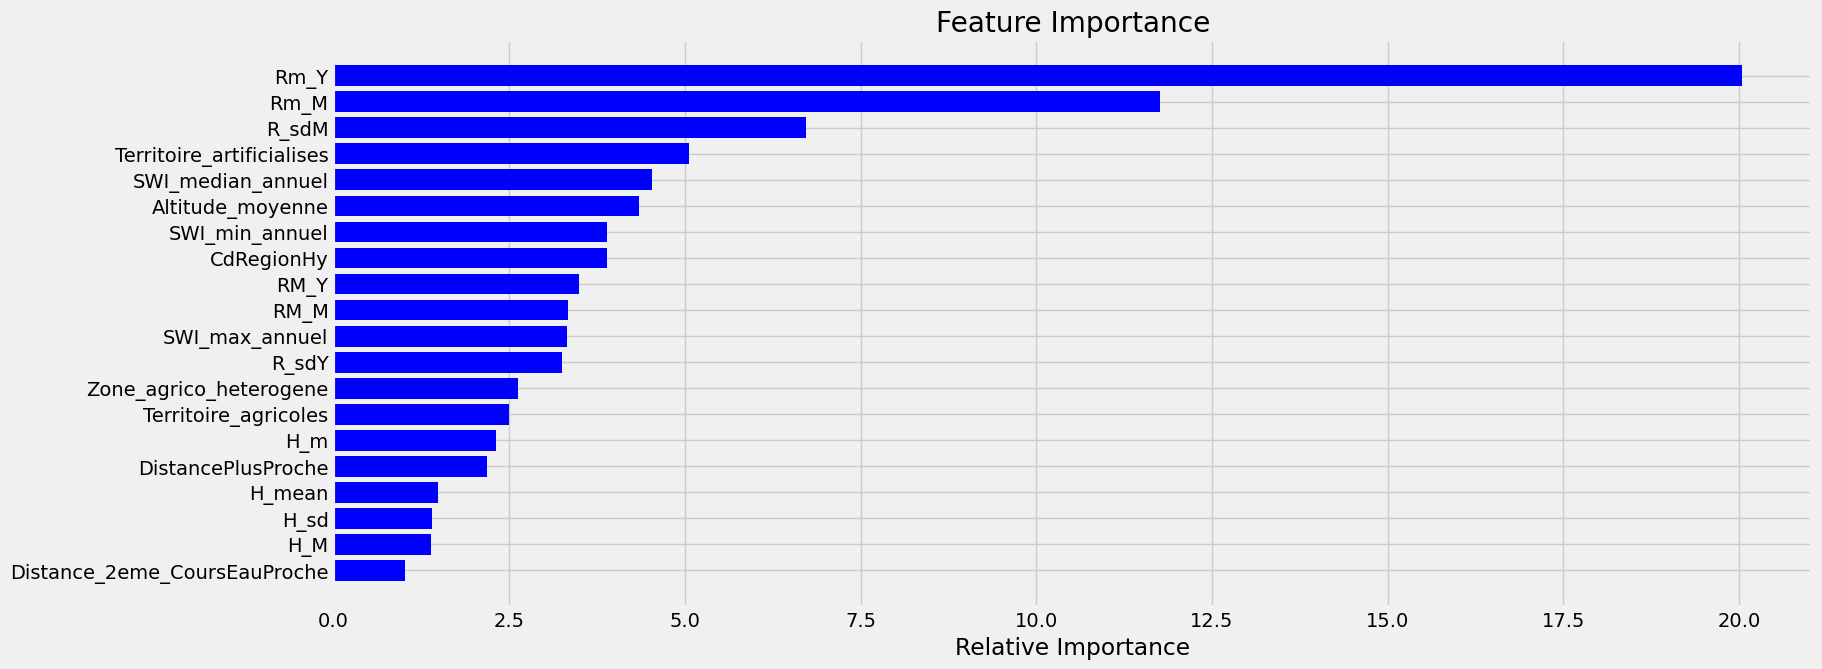

In [148]:
importances = catb_opt_pipeline1['classifier'].feature_importances_
indices = np.argsort(importances)
liste_variables = list(base_transformed.columns)

plt.subplots(figsize = (17, 7))
plt.figure(1)
plt.title('Feature Importance')
plt.barh(range(len(indices[-20:])), importances[indices][-20:], color = 'b', align = 'center')
plt.yticks(range(len(indices[-20:])), [liste_variables[i] for i in indices][-20:])
plt.xlabel('Relative Importance');

0:	learn: 0.6636822	total: 12.9s	remaining: 27m 33s
1:	learn: 0.6386953	total: 27.7s	remaining: 29m 18s
2:	learn: 0.6187831	total: 41.5s	remaining: 29m 2s
3:	learn: 0.6029688	total: 55.8s	remaining: 29m 4s
4:	learn: 0.5906892	total: 1m 8s	remaining: 28m 29s
5:	learn: 0.5786364	total: 1m 22s	remaining: 28m 9s
6:	learn: 0.5673570	total: 1m 34s	remaining: 27m 21s
7:	learn: 0.5581948	total: 1m 47s	remaining: 27m 7s
8:	learn: 0.5502844	total: 2m 1s	remaining: 27m 1s
9:	learn: 0.5422433	total: 2m 15s	remaining: 26m 48s
10:	learn: 0.5350793	total: 2m 28s	remaining: 26m 30s
11:	learn: 0.5270155	total: 2m 41s	remaining: 26m 10s
12:	learn: 0.5187810	total: 2m 54s	remaining: 25m 57s
13:	learn: 0.5126631	total: 3m 7s	remaining: 25m 43s
14:	learn: 0.5062208	total: 3m 21s	remaining: 25m 30s
15:	learn: 0.5019263	total: 3m 34s	remaining: 25m 18s
16:	learn: 0.4961943	total: 3m 49s	remaining: 25m 9s
17:	learn: 0.4910147	total: 4m 2s	remaining: 24m 55s
18:	learn: 0.4868854	total: 4m 15s	remaining: 24m 41

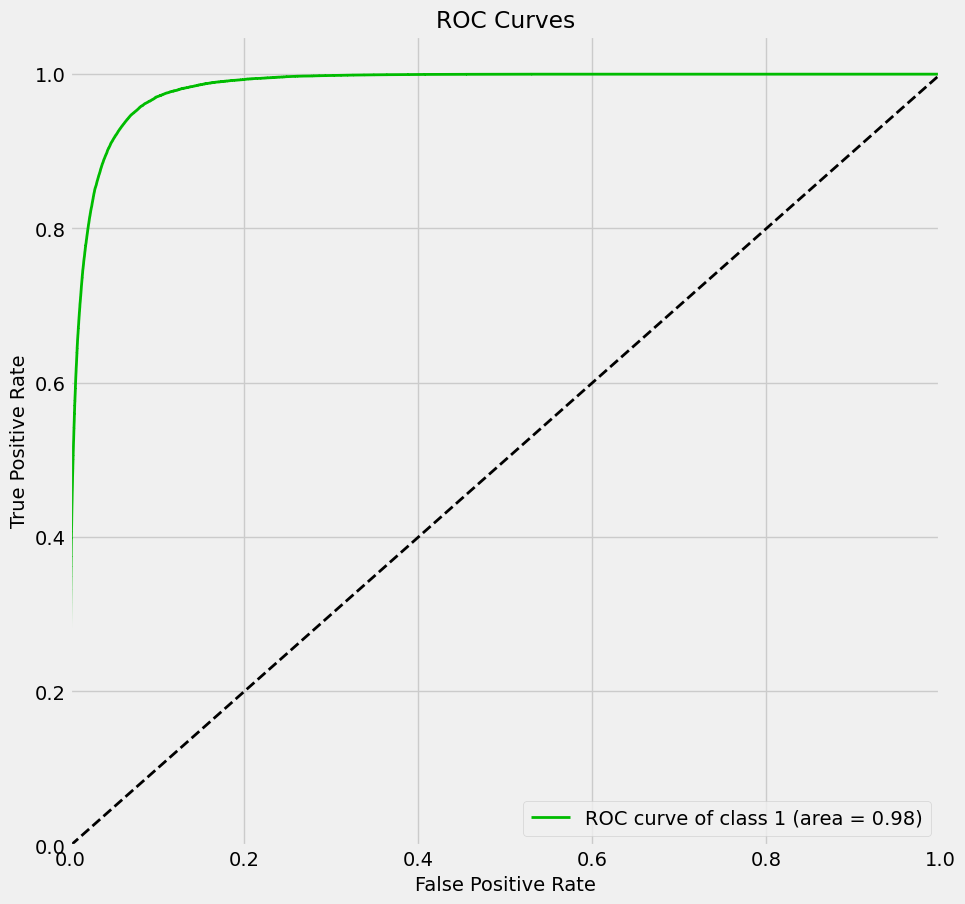

In [146]:
# courbe ROC avec scikitplot
nb = catb_opt_pipeline1.fit(X_test, y_test)
y_probas = nb.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (10, 10), plot_micro = False, plot_macro = False, classes_to_plot = 1)
plt.show()

In [119]:
#affichage des probas de prédictions de chaque classe pour les observations
cat_pred_test2_prob = catb_opt_pipeline1.predict_proba(X_test)
cat_pred_test2_prob 

array([[0.34644159, 0.65355841],
       [0.86200507, 0.13799493],
       [0.33346845, 0.66653155],
       ...,
       [0.64279202, 0.35720798],
       [0.94515821, 0.05484179],
       [0.69383306, 0.30616694]])

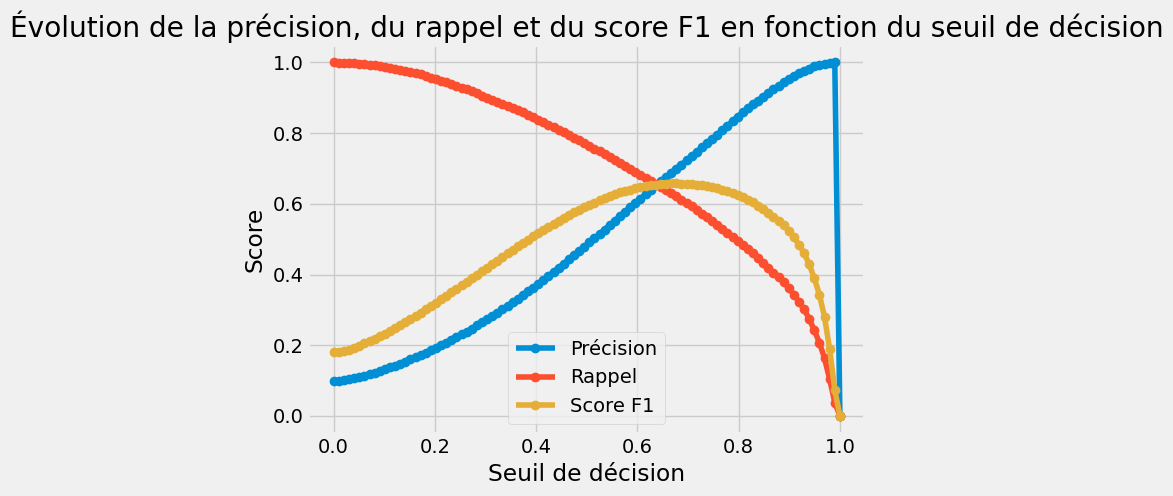

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
# Calculez la précision, le rappel et le score F1 pour chaque seuil de décision entre 0 et 1
thresholds = np.linspace(0, 1, 100)  # Créez 100 valeurs de seuil de décision entre 0 et 1
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    # Ajustez les prédictions en fonction du seuil de décision
    y_pred_adjusted = (cat_pred_test2_prob[:, 1] >= threshold).astype(int)
    
    # Calculez la précision, le rappel et le score F1 pour les prédictions ajustées
    precision = precision_score(y_test, y_pred_adjusted)
    recall = recall_score(y_test, y_pred_adjusted)
    f1 = f1_score(y_test, y_pred_adjusted)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Tracer les courbes de précision, de rappel et de score F1 sur le même graphique
plt.plot(thresholds, precisions, label='Précision', marker='o', linestyle='-')
plt.plot(thresholds, recalls, label='Rappel', marker='o', linestyle='-')
plt.plot(thresholds, f1_scores, label='Score F1', marker='o', linestyle='-')
plt.xlabel('Seuil de décision')
plt.ylabel('Score')
plt.title('Évolution de la précision, du rappel et du score F1 en fonction du seuil de décision')
plt.legend()
plt.grid(True)
plt.show()

In [155]:
# prédiction sur les données initiales
pred_catb_initiale1 = catb_opt_pipeline1.predict(X)

# Inspectez pred_test et vérifiez qu'il est bien composé que de 0 et de 1.
print(np.unique(pred_catb_initiale1))

[0 1]


In [156]:
X_cat= X
X_cat

,TRI,TRI_Portée_Nationale,SWI_max_annuel,SWI_min_annuel,SWI_median_annuel,SWI_moyenne_annuelle,SWI_ecart_type_annuel,DistancePlusProche,Distance_2eme_CoursEauProche,Distance_3eme_CoursEauProche,Altitude_moyenne,Territoire_artificialises,Territoire_agricoles,Zone_agrico_heterogene,Zone_humide_interieure,Zone_humides_cotiere,Eaux_continentales,Perimetre_irrigue,CdRegionHy,LbRegionHy,TYPO,RM_Y,Rm_Y,R_sdY,RM_M,Rm_M,R_sdM,Q_M,Q_m,Q_sd,Q_mean,H_M,H_m,H_sd,H_mean,R_M,R_m,R_sd,R_mean,R_median
0,oui,non,1.116,0.073,0.6585,0.641250,0.313774,251.422684,491.182449,907.320996,4.0,1581.633202,292.829642,238.687239,0.0,0.0,176.564567,0.0,E,l'Escaut et fleuves Côtiers se jetant dans la ...,4.0,23.046358,-0.000004,3.051966,23.046358,3.431611,4.357634,16.0,4.0,1.144667,15.723009,7652.736264,786.250000,382.274154,4532.333503,56.81696,-0.000007,3.476860,51.376431,50.289472
1,oui,non,1.065,0.329,0.6160,0.659917,0.238621,251.422684,491.182449,907.320996,4.0,1581.633202,292.829642,238.687239,0.0,0.0,176.564567,0.0,E,l'Escaut et fleuves Côtiers se jetant dans la ...,4.0,31.722342,0.000000,3.087065,31.722342,3.403099,6.355388,16.0,4.0,1.144667,15.723009,7652.736264,786.250000,382.274154,4532.333503,56.81696,-0.000007,3.476860,51.376431,50.289472
2,oui,non,1.127,0.357,0.6425,0.692083,0.242197,251.422684,491.182449,907.320996,4.0,1581.633202,292.829642,238.687239,0.0,0.0,176.564567,0.0,E,l'Escaut et fleuves Côtiers se jetant dans la ...,4.0,22.018023,0.000000,3.538769,22.018023,5.988844,3.974613,16.0,4.0,1.144667,15.723009,7652.736264,786.250000,382.274154,4532.333503,56.81696,-0.000007,3.476860,51.376431,50.289472
3,oui,non,1.106,0.439,0.8735,0.819083,0.242194,251.422684,491.182449,907.320996,4.0,1581.633202,292.829642,238.687239,0.0,0.0,176.564567,0.0,E,l'Escaut et fleuves Côtiers se jetant dans la ...,4.0,28.523090,0.000000,3.658379,28.523090,0.767015,8.153780,16.0,4.0,1.144667,15.723009,7652.736264,786.250000,382.274154,4532.333503,56.81696,-0.000007,3.476860,51.376431,50.289472
4,oui,non,1.094,0.263,0.8485,0.768583,0.310640,251.422684,491.182449,907.320996,4.0,1581.633202,292.829642,238.687239,0.0,0.0,176.564567,0.0,E,l'Escaut et fleuves Côtiers se jetant dans la ...,4.0,27.849726,-0.000004,3.043431,27.849726,2.800930,5.754157,16.0,4.0,1.144667,15.723009,7652.736264,786.250000,382.274154,4532.333503,56.81696,-0.000007,3.476860,51.376431,50.289472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466077,non,non,1.445,0.614,0.7830,0.900083,0.285924,994.308907,1190.061345,1195.752192,766.0,0.000000,72.825142,0.000000,0.0,0.0,0.000000,0.0,Y,Côtiers Méditerranéens,4.0,27.060787,-0.000004,4.072424,27.060787,2.472233,5.428551,16.0,4.0,1.081503,15.726058,9572.680000,281.716981,1960.554891,6367.116424,53.57999,-0.000007,4.060648,49.197031,49.290442
1466078,non,non,0.998,0.422,0.7485,0.712000,0.223364,994.308907,1190.061345,1195.752192,766.0,0.000000,72.825142,0.000000,0.0,0.0,0.000000,0.0,Y,Côtiers Méditerranéens,4.0,46.338596,0.000000,4.730068,46.338596,5.480485,7.591664,16.0,4.0,1.081503,15.726058,9572.680000,281.716981,1960.554891,6367.116424,53.57999,-0.000007,4.060648,49.197031,49.290442
1466079,non,non,1.284,0.435,0.7910,0.838333,0.326344,994.308907,1190.061345,1195.752192,766.0,0.000000,72.825142,0.000000,0.0,0.0,0.000000,0.0,Y,Côtiers Méditerranéens,4.0,32.778664,0.000000,3.915388,32.778664,6.792991,6.430359,16.0,4.0,1.081503,15.726058,9572.680000,281.716981,1960.554891,6367.116424,53.57999,-0.000007,4.060648,49.197031,49.290442
1466080,non,non,1.186,0.503,0.9240,0.885750,0.237337,994.308907,1190.061345,1195.752192,766.0,0.000000,72.825142,0.000000,0.0,0.0,0.000000,0.0,Y,Côtiers Méditerranéens,4.0,40.294018,-0.000004,3.470047,40.294018,5.508013,5.740204,16.0,4.0,1.081503,15.726058,9572.680000,281.716981,1960.554891,6367.116424,53.57999,-0.000007,4.060648,49.197031,49.290442


In [157]:
#association des prédictions aux données explicatives
X_cat['Predictions'] = pred_catb_initiale1

In [158]:
X_cat

,TRI,TRI_Portée_Nationale,SWI_max_annuel,SWI_min_annuel,SWI_median_annuel,SWI_moyenne_annuelle,SWI_ecart_type_annuel,DistancePlusProche,Distance_2eme_CoursEauProche,Distance_3eme_CoursEauProche,Altitude_moyenne,Territoire_artificialises,Territoire_agricoles,Zone_agrico_heterogene,Zone_humide_interieure,Zone_humides_cotiere,Eaux_continentales,Perimetre_irrigue,CdRegionHy,LbRegionHy,TYPO,RM_Y,Rm_Y,R_sdY,RM_M,Rm_M,R_sdM,Q_M,Q_m,Q_sd,Q_mean,H_M,H_m,H_sd,H_mean,R_M,R_m,R_sd,R_mean,R_median,Predictions
0,oui,non,1.116,0.073,0.6585,0.641250,0.313774,251.422684,491.182449,907.320996,4.0,1581.633202,292.829642,238.687239,0.0,0.0,176.564567,0.0,E,l'Escaut et fleuves Côtiers se jetant dans la ...,4.0,23.046358,-0.000004,3.051966,23.046358,3.431611,4.357634,16.0,4.0,1.144667,15.723009,7652.736264,786.250000,382.274154,4532.333503,56.81696,-0.000007,3.476860,51.376431,50.289472,0
1,oui,non,1.065,0.329,0.6160,0.659917,0.238621,251.422684,491.182449,907.320996,4.0,1581.633202,292.829642,238.687239,0.0,0.0,176.564567,0.0,E,l'Escaut et fleuves Côtiers se jetant dans la ...,4.0,31.722342,0.000000,3.087065,31.722342,3.403099,6.355388,16.0,4.0,1.144667,15.723009,7652.736264,786.250000,382.274154,4532.333503,56.81696,-0.000007,3.476860,51.376431,50.289472,0
2,oui,non,1.127,0.357,0.6425,0.692083,0.242197,251.422684,491.182449,907.320996,4.0,1581.633202,292.829642,238.687239,0.0,0.0,176.564567,0.0,E,l'Escaut et fleuves Côtiers se jetant dans la ...,4.0,22.018023,0.000000,3.538769,22.018023,5.988844,3.974613,16.0,4.0,1.144667,15.723009,7652.736264,786.250000,382.274154,4532.333503,56.81696,-0.000007,3.476860,51.376431,50.289472,1
3,oui,non,1.106,0.439,0.8735,0.819083,0.242194,251.422684,491.182449,907.320996,4.0,1581.633202,292.829642,238.687239,0.0,0.0,176.564567,0.0,E,l'Escaut et fleuves Côtiers se jetant dans la ...,4.0,28.523090,0.000000,3.658379,28.523090,0.767015,8.153780,16.0,4.0,1.144667,15.723009,7652.736264,786.250000,382.274154,4532.333503,56.81696,-0.000007,3.476860,51.376431,50.289472,1
4,oui,non,1.094,0.263,0.8485,0.768583,0.310640,251.422684,491.182449,907.320996,4.0,1581.633202,292.829642,238.687239,0.0,0.0,176.564567,0.0,E,l'Escaut et fleuves Côtiers se jetant dans la ...,4.0,27.849726,-0.000004,3.043431,27.849726,2.800930,5.754157,16.0,4.0,1.144667,15.723009,7652.736264,786.250000,382.274154,4532.333503,56.81696,-0.000007,3.476860,51.376431,50.289472,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466077,non,non,1.445,0.614,0.7830,0.900083,0.285924,994.308907,1190.061345,1195.752192,766.0,0.000000,72.825142,0.000000,0.0,0.0,0.000000,0.0,Y,Côtiers Méditerranéens,4.0,27.060787,-0.000004,4.072424,27.060787,2.472233,5.428551,16.0,4.0,1.081503,15.726058,9572.680000,281.716981,1960.554891,6367.116424,53.57999,-0.000007,4.060648,49.197031,49.290442,0
1466078,non,non,0.998,0.422,0.7485,0.712000,0.223364,994.308907,1190.061345,1195.752192,766.0,0.000000,72.825142,0.000000,0.0,0.0,0.000000,0.0,Y,Côtiers Méditerranéens,4.0,46.338596,0.000000,4.730068,46.338596,5.480485,7.591664,16.0,4.0,1.081503,15.726058,9572.680000,281.716981,1960.554891,6367.116424,53.57999,-0.000007,4.060648,49.197031,49.290442,0
1466079,non,non,1.284,0.435,0.7910,0.838333,0.326344,994.308907,1190.061345,1195.752192,766.0,0.000000,72.825142,0.000000,0.0,0.0,0.000000,0.0,Y,Côtiers Méditerranéens,4.0,32.778664,0.000000,3.915388,32.778664,6.792991,6.430359,16.0,4.0,1.081503,15.726058,9572.680000,281.716981,1960.554891,6367.116424,53.57999,-0.000007,4.060648,49.197031,49.290442,0
1466080,non,non,1.186,0.503,0.9240,0.885750,0.237337,994.308907,1190.061345,1195.752192,766.0,0.000000,72.825142,0.000000,0.0,0.0,0.000000,0.0,Y,Côtiers Méditerranéens,4.0,40.294018,-0.000004,3.470047,40.294018,5.508013,5.740204,16.0,4.0,1.081503,15.726058,9572.680000,281.716981,1960.554891,6367.116424,53.57999,-0.000007,4.060648,49.197031,49.290442,0


In [159]:
#association des predictions aux données initiales
CATNAT_NON_CATNAT['Predictions_catb'] = pred_catb_initiale1

In [160]:
CATNAT_NON_CATNAT

,Unnamed: 0,NUMERO,Insee,Année,Commune,DateDébut,DateFin,DateArrêté,DateJO,Franchise,Décision,TRI,Nom_TRI,TRI_Portée_Nationale,Arrêté,Longitudes,Latitudes,SWI_UNIF_MENS3,Quantile_SWI_Maille_Pct,Quantile_SWI_Mailles_Total_Pct,SWI_max_annuel,SWI_min_annuel,SWI_median_annuel,SWI_moyenne_annuelle,SWI_ecart_type_annuel,durée_inondation,DistancePlusProche,Distance_2eme_CoursEauProche,Distance_3eme_CoursEauProche,Altitude_moyenne,Territoire_artificialises,Territoire_agricoles,Zone_agrico_heterogene,Zone_humide_interieure,Zone_humides_cotiere,Eaux_continentales,Perimetre_irrigue,CdRegionHy,LbRegionHy,TYPO,RM_Y,Rm_Y,R_sdY,RM_M,Rm_M,R_sdM,era_RM_M,era_Rm_M,era_R_sdM,nb_jours_pluvieux/3j_avant,nb_jours_pluvieux/7j_avant,era_precip,era_rol3j,era_rol7j,era_rol10j,era_rol30j,Q_M,Q_m,Q_sd,Q_mean,Q_median,H_M,H_m,H_sd,H_mean,H_median,R_M,R_m,R_sd,R_mean,R_median,Predictions_catb
0,0,3.0,59271,2009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,oui,TRI_DUNKERQUE,non,0,2.290626,51.016863,NaN,NaN,NaN,1.116,0.073,0.6585,0.641250,0.313774,NaN,251.422684,491.182449,907.320996,4.0,1581.633202,292.829642,238.687239,0.0,0.0,176.564567,0.0,E,l'Escaut et fleuves Côtiers se jetant dans la ...,4.0,23.046358,-0.000004,3.051966,23.046358,3.431611,4.357634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,4.0,1.144667,15.723009,16.0,7652.736264,786.250000,382.274154,4532.333503,4538.000000,56.81696,-0.000007,3.476860,51.376431,50.289472,0
1,1,3.0,59271,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,oui,TRI_DUNKERQUE,non,0,2.290626,51.016863,NaN,NaN,NaN,1.065,0.329,0.6160,0.659917,0.238621,NaN,251.422684,491.182449,907.320996,4.0,1581.633202,292.829642,238.687239,0.0,0.0,176.564567,0.0,E,l'Escaut et fleuves Côtiers se jetant dans la ...,4.0,31.722342,0.000000,3.087065,31.722342,3.403099,6.355388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,4.0,1.144667,15.723009,16.0,7652.736264,786.250000,382.274154,4532.333503,4538.000000,56.81696,-0.000007,3.476860,51.376431,50.289472,0
2,2,3.0,59271,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,oui,TRI_DUNKERQUE,non,0,2.290626,51.016863,NaN,NaN,NaN,1.127,0.357,0.6425,0.692083,0.242197,NaN,251.422684,491.182449,907.320996,4.0,1581.633202,292.829642,238.687239,0.0,0.0,176.564567,0.0,E,l'Escaut et fleuves Côtiers se jetant dans la ...,4.0,22.018023,0.000000,3.538769,22.018023,5.988844,3.974613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,4.0,1.144667,15.723009,16.0,7652.736264,786.250000,382.274154,4532.333503,4538.000000,56.81696,-0.000007,3.476860,51.376431,50.289472,1
3,3,3.0,59271,1988.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,oui,TRI_DUNKERQUE,non,0,2.290626,51.016863,NaN,NaN,NaN,1.106,0.439,0.8735,0.819083,0.242194,NaN,251.422684,491.182449,907.320996,4.0,1581.633202,292.829642,238.687239,0.0,0.0,176.564567,0.0,E,l'Escaut et fleuves Côtiers se jetant dans la ...,4.0,28.523090,0.000000,3.658379,28.523090,0.767015,8.153780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,4.0,1.144667,15.723009,16.0,7652.736264,786.250000,382.274154,4532.333503,4538.000000,56.81696,-0.000007,3.476860,51.376431,50.289472,1
4,4,3.0,59271,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,oui,TRI_DUNKERQUE,non,0,2.290626,51.016863,NaN,NaN,NaN,1.094,0.263,0.8485,0.768583,0.310640,NaN,251.422684,491.182449,907.320996,4.0,1581.633202,292.829642,238.687239,0.0,0.0,176.564567,0.0,E,l'Escaut et fleuves Côtiers se jetant dans la ...,4.0,27.849726,-0.000004,3.043431,27.849726,2.800930,5.754157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,4.0,1.144667,15.723009,16.0,7652.736264,786.250000,382.274154,4532.333503,4538.000000,56.81696,-0.000007,3.476860,51.376431,50.289472,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466077,1466077,9805.0,66061,1997.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non,Aucun,non,0,2.637913,42.356427,NaN,NaN,NaN,1.445,0.614,0.7830,0.900083,0.285924,NaN,994.308907,1190.06

In [ ]:
import folium

# Créer une carte centrée sur une position initiale
mymap = folium.Map(location=[latitude_initial, longitude_initial], zoom_start=10)

# Ajouter des marqueurs pour chaque arrêté
for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Arrêté']).add_to(mymap)

# Afficher la carte
mymap


Modèle catboost sans poids sur les classes

In [121]:
# Création du classifier CATBoost sans poids
classifier_boost2 = CatBoostClassifier(iterations=100, learning_rate=0.1,  depth=14, loss_function='Logloss')
classifier_boost2

In [122]:
param_distributions = {'classifier__iterations': range(70, 130),
                       'classifier__learning_rate': np.linspace(0.05, 0.25, num=10),
                       'classifier__depth' : range(10, 40)}

# Nombre de combinaisons de paramètres à tester
n_iter_search = 20

# Création du Pipeline
catb_s_pipeline2 = Pipeline([('preprocessor', preprocessor), ('classifier', classifier_boost2)])

# Création du RandomizedSearchCV
catb_s_model2 = RandomizedSearchCV(catb_s_pipeline2, param_distributions, n_iter=n_iter_search, scoring = 'f1', cv = 3, n_jobs = -1, verbose = 3)

# Fitting du modèle sur les données d'entrainement
catb_s_model2.fit(X_train, y_train);

Fitting 3 folds for each of 20 candidates, totalling 60 fits
0:	learn: 0.5359767	total: 3.6s	remaining: 5m 23s
1:	learn: 0.4326098	total: 7.19s	remaining: 5m 20s
2:	learn: 0.3705555	total: 10.7s	remaining: 5m 14s
3:	learn: 0.3284804	total: 14.3s	remaining: 5m 10s
4:	learn: 0.3011246	total: 17.9s	remaining: 5m 7s
5:	learn: 0.2807087	total: 21.5s	remaining: 5m 4s
6:	learn: 0.2665962	total: 25.1s	remaining: 5m 1s
7:	learn: 0.2568802	total: 28.7s	remaining: 4m 58s
8:	learn: 0.2495735	total: 32.2s	remaining: 4m 53s
9:	learn: 0.2427785	total: 35.6s	remaining: 4m 48s
10:	learn: 0.2376207	total: 39.1s	remaining: 4m 44s
11:	learn: 0.2337268	total: 42.6s	remaining: 4m 40s
12:	learn: 0.2300539	total: 46.1s	remaining: 4m 36s
13:	learn: 0.2272436	total: 49.9s	remaining: 4m 34s
14:	learn: 0.2246498	total: 53.5s	remaining: 4m 31s
15:	learn: 0.2224101	total: 57.1s	remaining: 4m 27s
16:	learn: 0.2203347	total: 1m	remaining: 4m 24s
17:	learn: 0.2180323	total: 1m 4s	remaining: 4m 20s
18:	learn: 0.2166884

In [123]:
# Affichage du meilleur modèle
print('Les meilleurs paramètres sont :', catb_s_model2.best_params_)
print('Le meilleur modèle a un score de :', round(catb_s_model2.best_score_, 3))
print()

# Prédiction des données de test
pred_test = catb_s_model2.predict(X_test)

# Affichage des metrics
print('** Score sur les données de test **')
print('Precision :', round(precision_score(y_test, pred_test), 3))
print('Recall :', round(recall_score(y_test, pred_test), 3))
print('F1 Score :', round(f1_score(y_test, pred_test), 3))

Les meilleurs paramètres sont : {'classifier__learning_rate': 0.16111111111111112, 'classifier__iterations': 91, 'classifier__depth': 14}
Le meilleur modèle a un score de : 0.601

** Score sur les données de test **
Precision : 0.909
Recall : 0.45
F1 Score : 0.602


In [125]:
classifier = CatBoostClassifier(iterations=91, learning_rate=0.16111111111111112, depth=14, loss_function='Logloss')
classifier

catb_opt_pipeline2 = Pipeline([('preprocessor', preprocessor), ('classifier', classifier)])

In [126]:
# Fit sur les données d'entrainement avec les paramètres optimaux
catb_clf_opt2 = catb_opt_pipeline2.fit(X_train, y_train)

0:	learn: 0.5359767	total: 3.59s	remaining: 5m 22s
1:	learn: 0.4326098	total: 7.09s	remaining: 5m 15s
2:	learn: 0.3705555	total: 10.8s	remaining: 5m 16s
3:	learn: 0.3284804	total: 14.4s	remaining: 5m 13s
4:	learn: 0.3011246	total: 18.3s	remaining: 5m 15s
5:	learn: 0.2807087	total: 21.9s	remaining: 5m 10s
6:	learn: 0.2665962	total: 25.4s	remaining: 5m 4s
7:	learn: 0.2568802	total: 28.9s	remaining: 4m 59s
8:	learn: 0.2495735	total: 32.4s	remaining: 4m 54s
9:	learn: 0.2427785	total: 35.8s	remaining: 4m 50s
10:	learn: 0.2376207	total: 39.6s	remaining: 4m 48s
11:	learn: 0.2337268	total: 43.2s	remaining: 4m 44s
12:	learn: 0.2300539	total: 46.7s	remaining: 4m 40s
13:	learn: 0.2272436	total: 50.3s	remaining: 4m 36s
14:	learn: 0.2246498	total: 54s	remaining: 4m 33s
15:	learn: 0.2224101	total: 57.4s	remaining: 4m 29s
16:	learn: 0.2203347	total: 1m 1s	remaining: 4m 25s
17:	learn: 0.2180323	total: 1m 4s	remaining: 4m 21s
18:	learn: 0.2166884	total: 1m 8s	remaining: 4m 18s
19:	learn: 0.2157147	tota

In [127]:
# prédiction sur les données de test
pred_catb_test2 = catb_opt_pipeline2.predict(X_test)

# Inspectez pred_test et vérifiez qu'il est bien composé que de 0 et de 1.
print(np.unique(pred_catb_test2))

[0 1]


In [128]:
# Afficher la matrice de confusion
print(confusion_matrix(y_test, pred_catb_test2))

[[385037   1923]
 [ 23296  19097]]


In [129]:
# Afficher le rapport de classification 'classification_report()'
print(classification_report(y_test,pred_catb_test2))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    386960
           1       0.91      0.45      0.60     42393

    accuracy                           0.94    429353
   macro avg       0.93      0.72      0.79    429353
weighted avg       0.94      0.94      0.93    429353



In [130]:
#affichage des probas de prédictions de chaque classe pour les observations
cat_pred_test3_prob = catb_opt_pipeline2.predict_proba(X_test)
cat_pred_test3_prob

array([[0.84502358, 0.15497642],
       [0.98307263, 0.01692737],
       [0.71940079, 0.28059921],
       ...,
       [0.92149129, 0.07850871],
       [0.97218651, 0.02781349],
       [0.96369787, 0.03630213]])

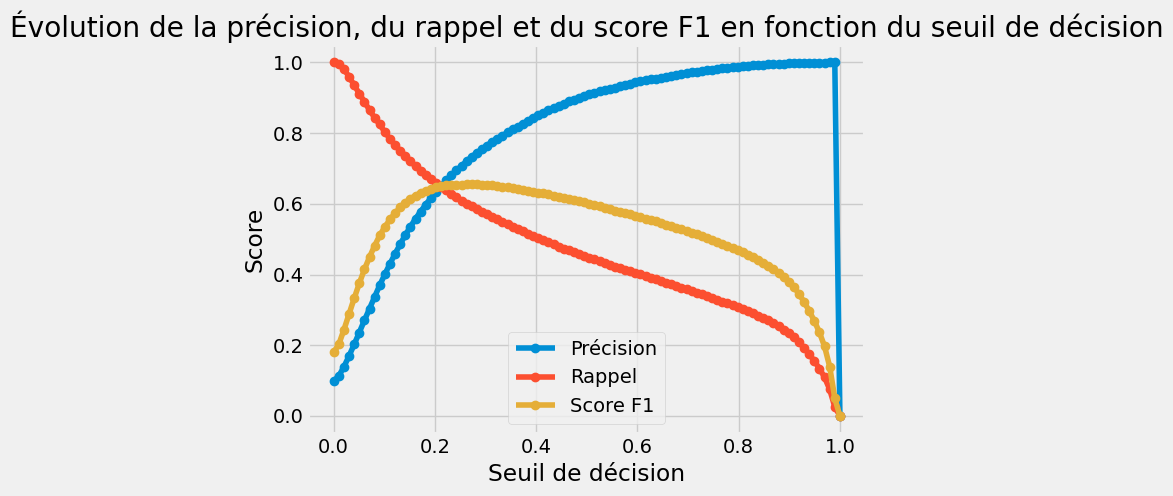

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
# Calculez la précision, le rappel et le score F1 pour chaque seuil de décision entre 0 et 1
thresholds = np.linspace(0, 1, 100)  # Créez 100 valeurs de seuil de décision entre 0 et 1
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    # Ajustez les prédictions en fonction du seuil de décision
    y_pred_adjusted = (cat_pred_test3_prob[:, 1] >= threshold).astype(int)
    
    # Calculez la précision, le rappel et le score F1 pour les prédictions ajustées
    precision = precision_score(y_test, y_pred_adjusted)
    recall = recall_score(y_test, y_pred_adjusted)
    f1 = f1_score(y_test, y_pred_adjusted)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Tracer les courbes de précision, de rappel et de score F1 sur le même graphique
plt.plot(thresholds, precisions, label='Précision', marker='o', linestyle='-')
plt.plot(thresholds, recalls, label='Rappel', marker='o', linestyle='-')
plt.plot(thresholds, f1_scores, label='Score F1', marker='o', linestyle='-')

plt.xlabel('Seuil de décision')
plt.ylabel('Score')
plt.title('Évolution de la précision, du rappel et du score F1 en fonction du seuil de décision')
plt.legend()
plt.grid(True)
plt.show()

In [135]:
# Trouver l'index où la différence absolue entre précision et rappel est minimale
idx_min_diff = np.argmin(np.abs(np.array(precisions) - np.array(recalls)))

# Seuil de décision où la précision est égale au rappel
threshold_eq_precision_recall = thresholds[idx_min_diff]

# Afficher le seuil
print("Seuil où précision = rappel :", threshold_eq_precision_recall)

Seuil où précision = rappel : 1.0


XGBoost